#**PROYECTO FINAL INTEGRADOR**

#**1. Objetivo:**

El objetivo es crear un modelo de machine learning que pueda predecir el valor del colesterol HDL a partir de la tensión arterial, el índice de masa corporal y/o el perímetro de cintura.

#**2. Contexto:**

De acuerdo a la información científica vigente, se sabe que el colesterol HDL (conocido popularmente como "colesterol bueno") tiene un papel en la prevención del riesgo de enfermedad cardiovascular. Por otra parte, tanto el perímetro de cintura (circunferencia abdominal) como el índice de masa corporal se relacionan con un mayor riesgo cardiovascular.


#**3.Problema:**


Me desempeño como científica de datos en una institución sanitaria privada que desea conocer si es posible predecir el valor de colesterol HDL de un paciente sin efectuar el examen de laboratorio. Con esto pretenden implementar medidas de prevención primaria dirigidas a las personas con bajo colesterol HDL.

**Como parte de este proyecto, una de las preguntas planteadas es: **"¿Es posible desarrollar una fórmula que calcule el valor del colesterol HDL a partir de la tensión arterial, el índice de masa corporal y/o el perímetro de cintura?

**Contexto analítico.** El departamento de administración nos ha proporcionado una base de datos donde constan los registros de los pacientes que han sido atendidos en los últimos 5 años. Sobre este conjunto de datos se aplicarán técnicas de aprendizaje supervisado para resolver el problema planteado.

El caso está estructurado de la siguiente manera:

1) Realizaremos un análisis de datos exploratorio para investigar visualmente la relación entre los valores de colesterol HDL y perímetro de cintura e IMC;

2) A partir de lo observado, ajustaremos los modelos de (regresión lineal);

3) Finalmente, se intentará predecir a partir de qué valores de colesterol es más problable que la tensión arterial aumente, si es que se detecta una relación positiva.

##**HIPÓTESIS:**
**“Se podría determinar el valor del colesterol HDL a partir de la tensión arterial, el índice de masa corporal y/o el perímetro de cintura”.**




#**4. Data Acquisition**


##Importar librerías y dar acceso a Google Drive

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# conexion a drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
habitos2 = pd.read_csv('/content/drive/MyDrive/CoderHouse_DataScience/TPintegrador/preentrega2/archivos_csv/habitos.csv')
habitos2.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


DATAFRAME HÁBITOS

**Sobre este Dataset**

Los datos son del servicio de salud coreano.

Esta tomado de https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset?resource=download


**Referencias:**

- **Sex**	male, female

- **age**	redondeado hacia arriba cada 5 años

- **height**	redondeado hacia arriba cada 5 cm [cm]

- **weight**	[kg]

- **waistline** perímetro de cintura [cm]

- **sight_left**	vision ojo izquierdo

- **sight_right**	vision ojo derecho

- **hear_left**	audicion oido izquierdo, 1(normal), 2(alterada)

- **hear_right**	audicion oido derecho, 1(normal), 2(alterada)

- **SBP**	presion arterial sistolica [mmHg]

- **DBP**	presion arterial diastolica [mmHg]

- **BLDS**	glucemia en ayunas [mg/dL]

- **tot_chole**	colesterol total [mg/dL]

- **HDL_chole**	colesterol HDL [mg/dL]

- **LDL_chole**	colesterol LDL [mg/dL]

- **triglyceride**	trigliceridos [mg/dL]

- **hemoglobin**	hemoglobina [g/dL]

- **urine_protein**	proteinas en orina: 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)

- **serum_creatinine**	creatinina serica [mg/dL]

- **SGOT_AST**	TGO (AST) [IU/L]

- **SGOT_ALT**	TGP (ALT) [IU/L]

- **gamma_GTP**	gamma GT [IU/L]

- **SMK_stat_type_cd**	status de tabaquismo, 1(nunca), 2(fumaba pero dejo),
3(actualmente fuma)

- **DRK_YN**	bebedor [Y/N]

#**5. EDA (Análisis Exploratorio de Datos):**

En primer lugar, vamos a explorar el dataframe.

In [ ]:
# Informacion del dataframe
print('Estructura del dataframe: ', habitos2.shape)
habitos2.info()

Estructura del dataframe:  (991346, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non

* **Dimensiones:** age, sex,	sight_left,	sight_right,	hear_left,	hear_right,		urine_protein,	SMK_stat_type_cd,	DRK_YN.
* **Medidas:** height,	weight,	waistline, SBP, DBP, BLDS, tot_chole, HDL_chole, 	LDL_chole,	triglyceride,	hemoglobin, serum_creatinine,	 SGOT_AST, 	SGOT_ALT,	gamma_GTP.

**Age, si bien es un dato numérico, sirve para clasificar los datos de otras columnas. Además, no es posible hacer calculos con esta columna (por ejemplo, sumar o multiplicar los registros no tendría ningún sentido).**

In [ ]:
# Estadisticas del dataframe
# Lo parto en 3 porque no me muestra todas las columnas en una sola consulta
habitos2[['sex','age','height','weight','waistline','sight_left','sight_right','hear_left','hear_right']].describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000


In [ ]:
habitos2[['SBP','DBP', 'BLDS','tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin']].describe()

,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,122.432498,76.052627,100.424447,195.557020,56.936800,113.037692,132.141751,14.229824
std,14.543148,9.889365,24.179960,38.660155,17.238479,35.842812,102.196985,1.584929
min,67.000000,32.000000,25.000000,30.000000,1.000000,1.000000,1.000000,1.000000
25%,112.000000,70.000000,88.000000,169.000000,46.000000,89.000000,73.000000,13.200000
50%,120.000000,76.000000,96.000000,193.000000,55.000000,111.000000,106.000000,14.300000
75%,131.000000,82.000000,105.000000,219.000000,66.000000,135.000000,159.000000,15.400000
max,273.000000,185.000000,852.000000,2344.000000,8110.000000,5119.000000,9490.000000,25.000000


In [ ]:
habitos2[['urine_protein','serum_creatinine','SGOT_AST','SGOT_ALT','gamma_GTP','SMK_stat_type_cd','DRK_YN']].describe()

,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


##**Conclusiones del EDA inicial:**
El dataframe consta de 991.346 filas y 24 columnas, sin datos nulos.

Puedo observar que algunos datos impresionan ser outliers. Sin embargo, observo que en este dataframe se toman como outliers todos los valores por encima del valor normal. No me conviene borrar todos los outliers porque entonces me quedaría solamente con valores normales. Por otra parte, también hay algunos errores que corresponden a valores humanamente imposibles. Voy a recorrer cada columna para ir ajustando los datos.

#**6. Data Wrangling por columnas**

A partir de los graficos detecto los outliers y los voy corrigiendo.

##Género

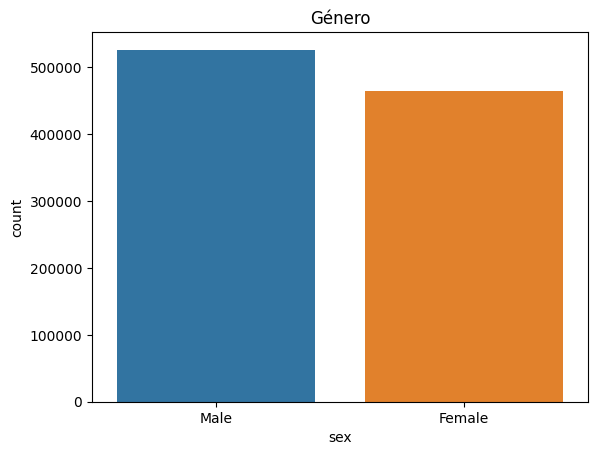

In [ ]:
sns.countplot(data=habitos2, x='sex')
plt.title('Género')

plt.show()

Los datos son correctos, no requiere ajustes.

##Edad

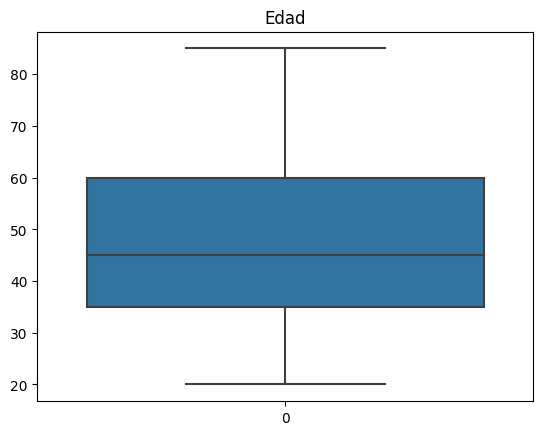

In [ ]:
sns.boxplot(habitos2['age'])
plt.title('Edad')

plt.show()

Los datos son correctos, no requiere ajustes.

##Peso

In [ ]:
# outliers peso - ver Q1 y Q3
habitos2['weight'].describe()

count    991346.000000
mean         63.284050
std          12.514241
min          25.000000
25%          55.000000
50%          60.000000
75%          70.000000
max         140.000000
Name: weight, dtype: float64

Voy a tomar como peso mínimo de un adulto 40 kg, es decir, borro los valores menores a 40. Primero los cuento y luego los borro.

In [ ]:
# contar outliers. VALORES DE REFERENCIA 40 - 140
# outliers peso - contar outliers bajos
cantidad_infra = (habitos2['weight'] < 40).sum()
# outliers peso - contar outliers altos
cantidad_supra = (habitos2['weight'] > 140).sum()
print(f'Por debajo de 40 kg: {cantidad_infra}, por encima de 140 kg: {cantidad_supra}')

Por debajo de 40 kg: 2114, por encima de 140 kg: 0


In [ ]:
# me quedo con los valores > 40 kg
habitos2 = habitos2[habitos2['weight'] >= 40]

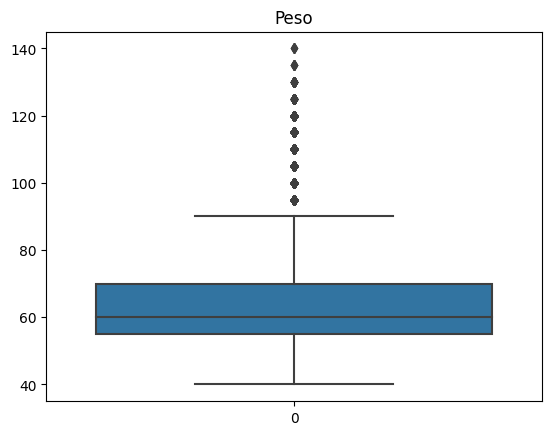

In [ ]:
sns.boxplot(habitos2['weight'])
plt.title('Peso')

plt.show()

##Perímetro de cintura


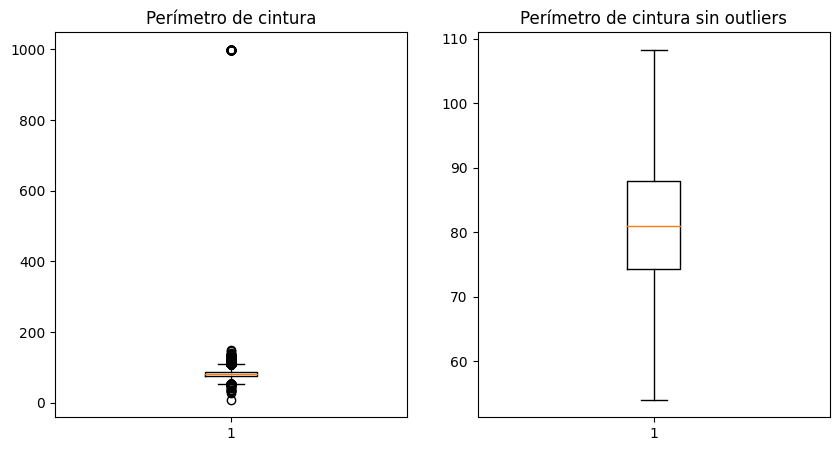

In [ ]:
fig, graficos = plt.subplots(1,2, figsize = (10,5))

graficos[0].boxplot(habitos2['waistline'])
graficos[0].set_title('Perímetro de cintura')
graficos[1].boxplot(habitos2['waistline'], showfliers=False)
graficos[1].set_title('Perímetro de cintura sin outliers')

fig.show()

In [ ]:
# outliers cintura - ver estadisticas
habitos2['waistline'].describe()

count    989232.000000
mean         81.265653
std          11.837209
min           8.000000
25%          74.300000
50%          81.000000
75%          87.900000
max         999.000000
Name: waistline, dtype: float64

In [ ]:
# primero borro las que estan muy alejadas
habitos2 = habitos2[habitos2['waistline'] <= 500]

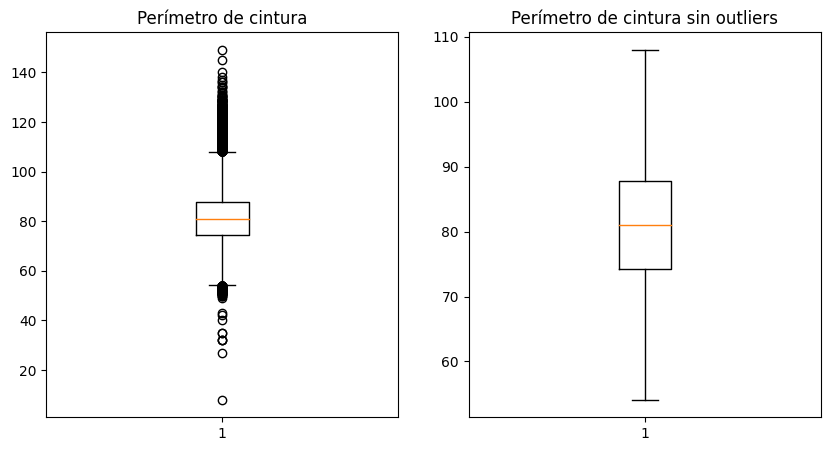

In [ ]:
fig, graficos = plt.subplots(1,2, figsize = (10,5))

graficos[0].boxplot(habitos2['waistline'])
graficos[0].set_title('Perímetro de cintura')
graficos[1].boxplot(habitos2['waistline'], showfliers=False)
graficos[1].set_title('Perímetro de cintura sin outliers')

fig.show()

Voy a tomar como perímetro minimo 45 cm y máximo 130 cm.

In [ ]:
# contar outliers. VALORES DE REFERENCIA 45 - 130
# outliers bajos
cantidad_infra = (habitos2['waistline'] < 45).sum()
cantidad_supra = (habitos2['waistline'] > 130).sum()
print(f'Por debajo: {cantidad_infra}, por encima: {cantidad_supra}')

Por debajo: 10, por encima: 18


In [ ]:
# borrar outliers
habitos2 = habitos2[habitos2['waistline'] <= 130]
habitos2 = habitos2[habitos2['waistline'] >= 45]

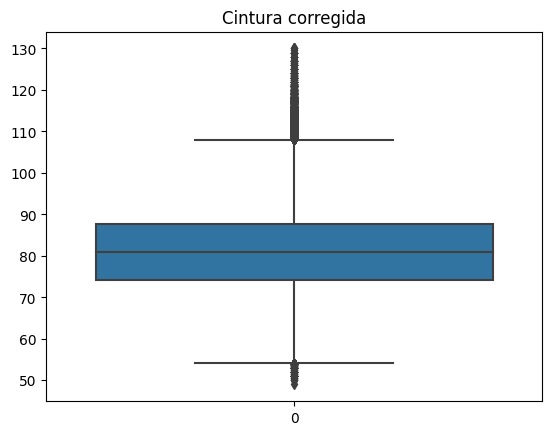

In [ ]:
sns.boxplot(habitos2['waistline'])
plt.title('Cintura corregida')

plt.show()

##TA sistólica y diastólica


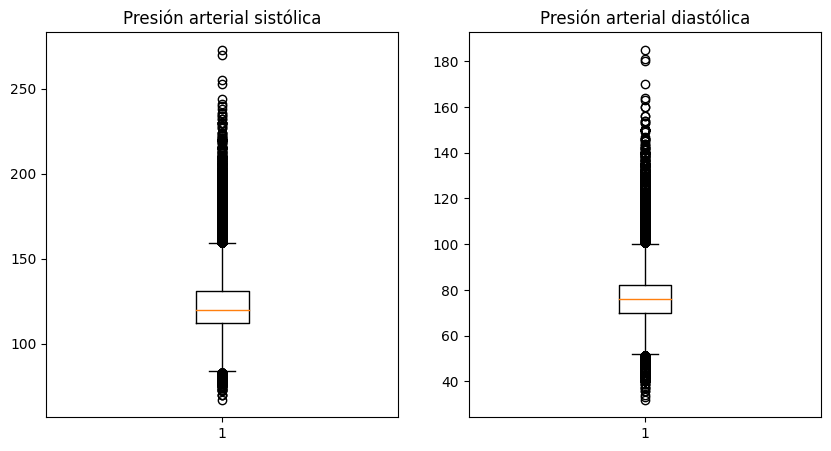

In [ ]:
fig, graficos = plt.subplots(1,2, figsize = (10,5))

graficos[0].boxplot(habitos2['SBP'])
graficos[0].set_title('Presión arterial sistólica')
graficos[1].boxplot(habitos2['DBP'], showfliers=True)
graficos[1].set_title('Presión arterial diastólica')

fig.show()

Los datos son correctos, no requiere ajustes.

##Glucemia en ayunas

Text(0.5, 1.0, 'Glucemia en ayunas')

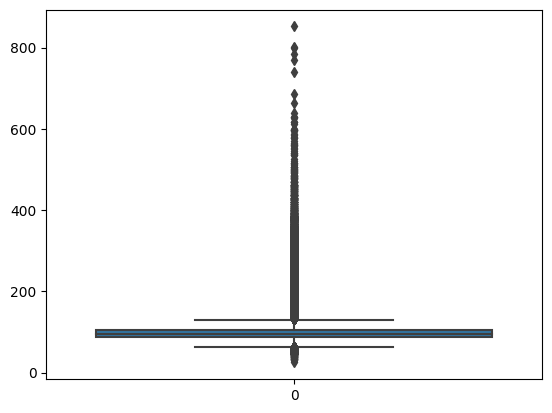

In [ ]:
sns.boxplot(habitos2['BLDS'])
graficos[0].set_title('Glucemia en ayunas')

Los valores de referencia son: mínimo 40 mg/dl, máximo 350 mg/dl.

In [ ]:
# contar outliers. VALORES DE REFERENCIA 40 - 350
# outliers bajos
cantidad_infra = (habitos2['BLDS'] < 40).sum()
# outliers altos
cantidad_supra = (habitos2['BLDS'] > 350).sum()
print(f'Por debajo: {cantidad_infra}, por encima: {cantidad_supra}')

Por debajo: 15, por encima: 303


In [ ]:
# borrar outliers
habitos2 = habitos2[habitos2['BLDS'] <= 350]
habitos2 = habitos2[habitos2['BLDS'] >= 40]

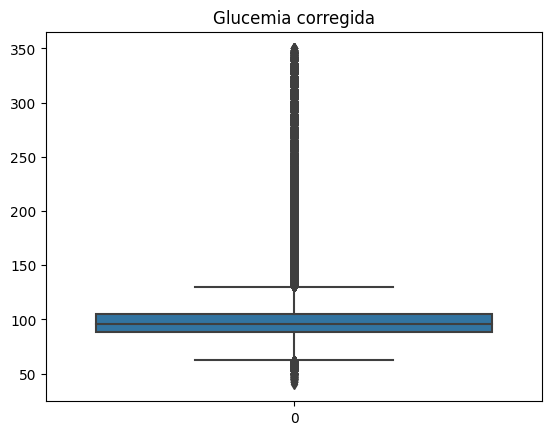

In [ ]:
sns.boxplot(habitos2['BLDS'])
plt.title('Glucemia corregida')

plt.show()

##Colesterol total y HDL

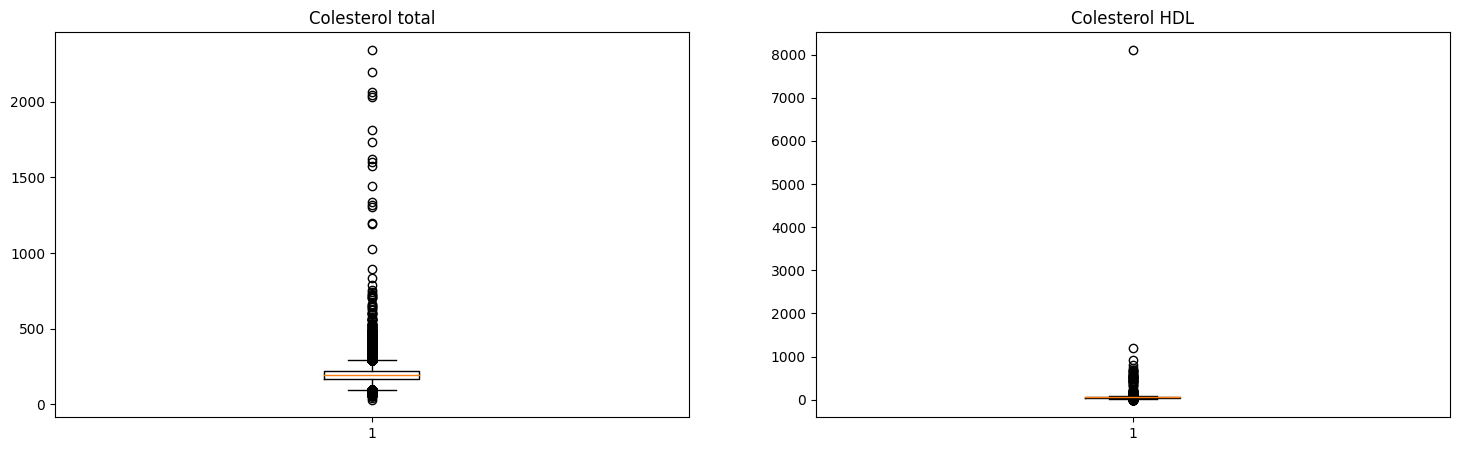

In [ ]:
fig, graficos = plt.subplots(1,2, figsize = (18,5))

graficos[0].boxplot(habitos2['tot_chole'])
graficos[0].set_title('Colesterol total')
graficos[1].boxplot(habitos2['HDL_chole'])
graficos[1].set_title('Colesterol HDL')

fig.show()

In [ ]:
# primero borro las que estan muy alejadas
habitos2 = habitos2[habitos2['tot_chole'] <=1000]
habitos2 = habitos2[habitos2['HDL_chole'] <=1000]

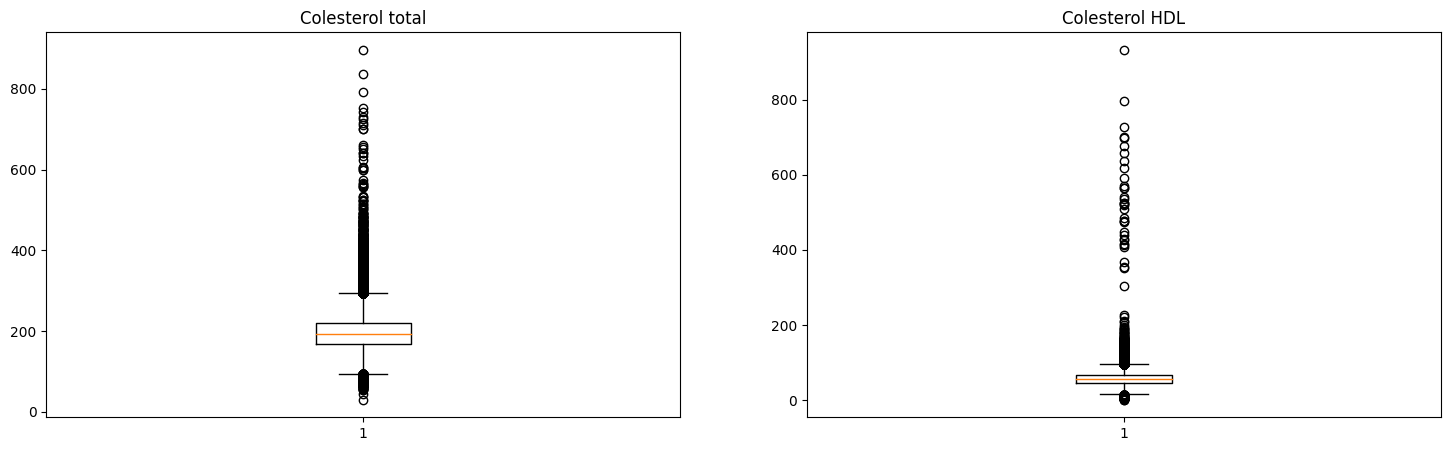

In [ ]:
fig, graficos = plt.subplots(1,2, figsize = (18,5))

graficos[0].boxplot(habitos2['tot_chole'])
graficos[0].set_title('Colesterol total')
graficos[1].boxplot(habitos2['HDL_chole'])
graficos[1].set_title('Colesterol HDL')

fig.show()

Los valores de referencia son:

* Colesterol total: mínimo 50 mg/dl, máximo 400 mg/dl.
* Colesterol HDL: mínimo 5 mg/dl, máximo 120 mg/dl.

In [ ]:
# contar outliers COLESTEROL TOTAL. VALORES DE REFERENCIA 50 - 400
# outliers bajos
cantidad_infra = (habitos2['tot_chole'] < 50).sum()
# outliers altos
cantidad_supra = (habitos2['tot_chole'] > 400).sum()
print(f'Por debajo: {cantidad_infra}, por encima: {cantidad_supra}')

Por debajo: 0, por encima: 150


In [ ]:
# borrar outliers COLESTEROL TOTAL
habitos2 = habitos2[habitos2['tot_chole'] <= 400]
habitos2 = habitos2[habitos2['tot_chole'] >= 50]

In [ ]:
# contar outliers COLESTEROL HDL. VALORES DE REFERENCIA 5 - 120
# outliers bajos
cantidad_infra = (habitos2['HDL_chole'] < 5).sum()
# outliers altos
cantidad_supra = (habitos2['HDL_chole'] > 120).sum()
print(f'Por debajo: {cantidad_infra}, por encima: {cantidad_supra}')

Por debajo: 12, por encima: 1020


In [ ]:
# borrar outliers COLESTEROL HDL
habitos2 = habitos2[habitos2['HDL_chole'] <= 120]
habitos2 = habitos2[habitos2['HDL_chole'] >= 5]

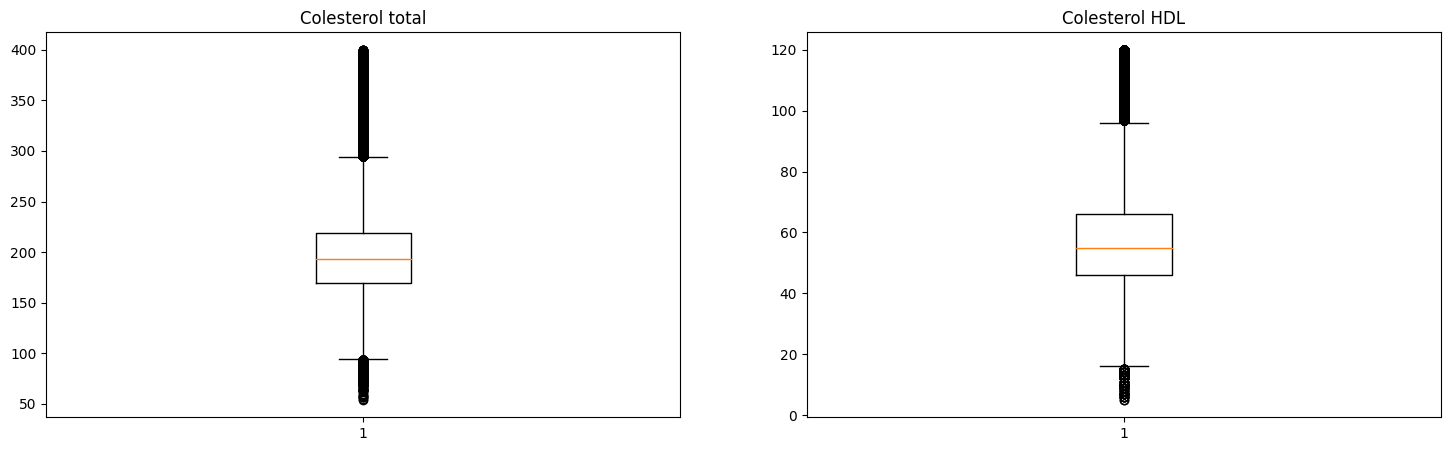

In [ ]:
fig, graficos = plt.subplots(1,2, figsize = (18,5))

graficos[0].boxplot(habitos2['tot_chole'])
graficos[0].set_title('Colesterol total')
graficos[1].boxplot(habitos2['HDL_chole'])
graficos[1].set_title('Colesterol HDL')

fig.show()

##Colesterol LDL y Triglicéridos

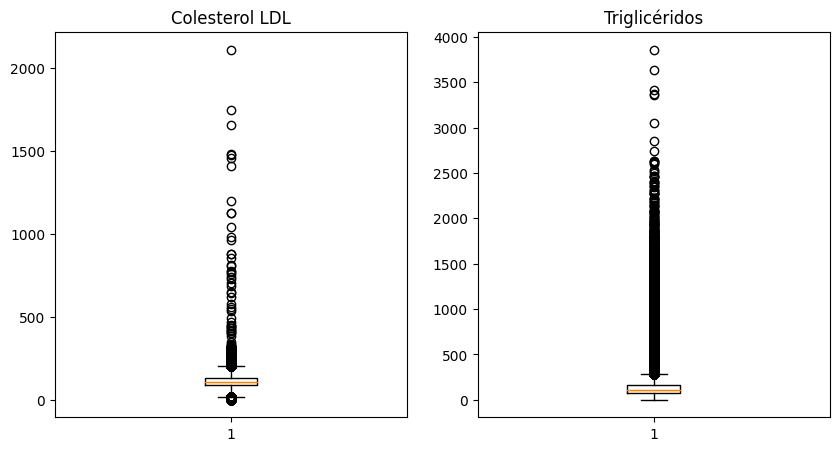

In [ ]:
fig, graficos = plt.subplots(1,2, figsize = (10,5))

graficos[0].boxplot(habitos2['LDL_chole'])
graficos[0].set_title('Colesterol LDL')
graficos[1].boxplot(habitos2['triglyceride'])
graficos[1].set_title('Triglicéridos')

fig.show()

In [ ]:
# primero borro las que estan muy alejadas
habitos2 = habitos2[habitos2['LDL_chole'] <=1000]
habitos2 = habitos2[habitos2['triglyceride'] <=2000]

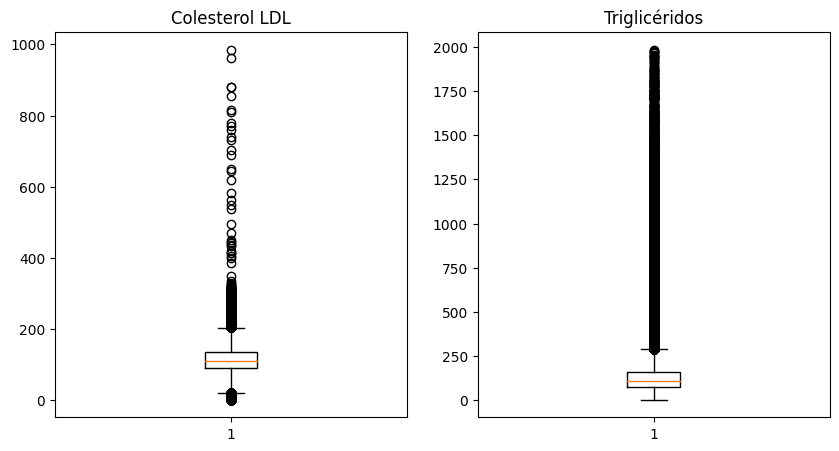

In [ ]:
fig, graficos = plt.subplots(1,2, figsize = (10,5))

graficos[0].boxplot(habitos2['LDL_chole'])
graficos[0].set_title('Colesterol LDL')
graficos[1].boxplot(habitos2['triglyceride'])
graficos[1].set_title('Triglicéridos')

fig.show()

Los valores de referencia son:

* Colesterol LDL: mínimo 20 mg/dl, máximo 280 mg/dl.
* Triglicéridos: mínimo 10 mg/dl, máximo 1000 mg/dl.

In [ ]:
# contar outliers COLESTEROL LDL. VALORES DE REFERENCIA 20 - 280
# outliers bajos
cantidad_infra = (habitos2['LDL_chole'] < 20).sum()
# outliers altos
cantidad_supra = (habitos2['LDL_chole'] > 280).sum()
print(f'Por debajo: {cantidad_infra}, por encima: {cantidad_supra}')

Por debajo: 900, por encima: 193


In [ ]:
# borrar outliers COLESTEROL LDL
habitos2 = habitos2[habitos2['LDL_chole'] <= 280]
habitos2 = habitos2[habitos2['LDL_chole'] >= 20]

In [ ]:
# contar outliers TRIGLICERIDOS. VALORES DE REFERENCIA 10 - 1000
# outliers bajos
cantidad_infra = (habitos2['triglyceride'] < 10).sum()
# outliers altos
cantidad_supra = (habitos2['triglyceride'] > 1000).sum()
print(f'Por debajo: {cantidad_infra}, por encima: {cantidad_supra}')

Por debajo: 40, por encima: 962


In [ ]:
# borrar outliers TRIGLICERIDOS
habitos2 = habitos2[habitos2['triglyceride'] <= 1000]
habitos2 = habitos2[habitos2['triglyceride'] >= 10]

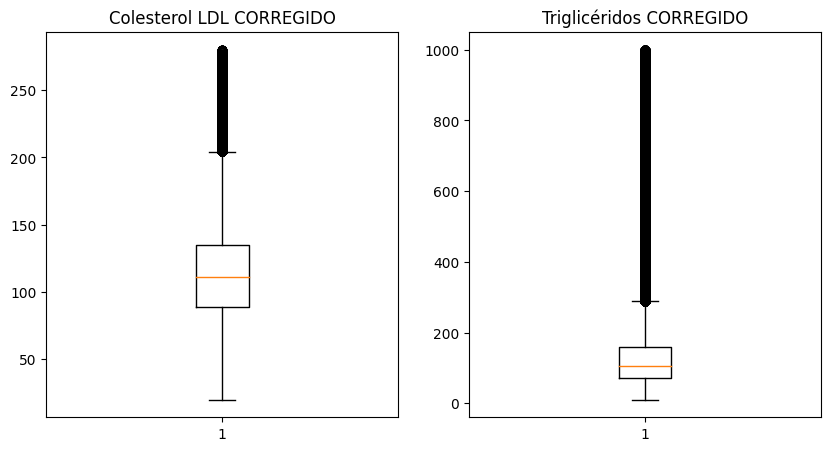

In [ ]:
fig, graficos = plt.subplots(1,2, figsize = (10,5))

graficos[0].boxplot(habitos2['LDL_chole'])
graficos[0].set_title('Colesterol LDL CORREGIDO')
graficos[1].boxplot(habitos2['triglyceride'])
graficos[1].set_title('Triglicéridos CORREGIDO')

fig.show()

##Hemoglobina

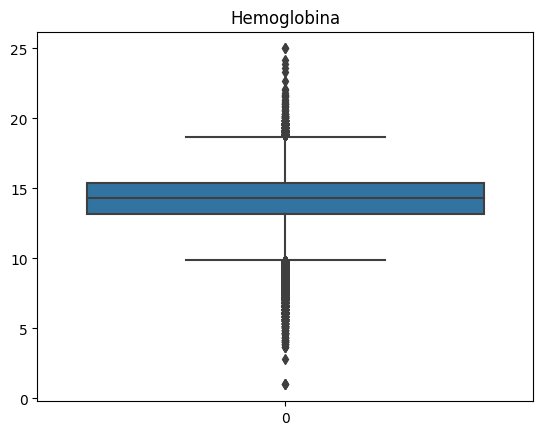

In [ ]:
sns.boxplot(habitos2['hemoglobin'])
plt.title('Hemoglobina')

plt.show()

Los valores de referencia son: mínimo 5 g/dl, máximo 20 g/dl.

In [ ]:
# contar outliers Hemoglobina. VALORES DE REFERENCIA 5 - 20
# outliers bajos
cantidad_infra = (habitos2['hemoglobin'] < 5).sum()
# outliers altos
cantidad_supra = (habitos2['hemoglobin'] > 20).sum()
print(f'Por debajo: {cantidad_infra}, por encima: {cantidad_supra}')

Por debajo: 37, por encima: 42


In [ ]:
# borrar outliers Hemoglobina
habitos2 = habitos2[habitos2['hemoglobin'] <= 20]
habitos2 = habitos2[habitos2['hemoglobin'] >= 5]

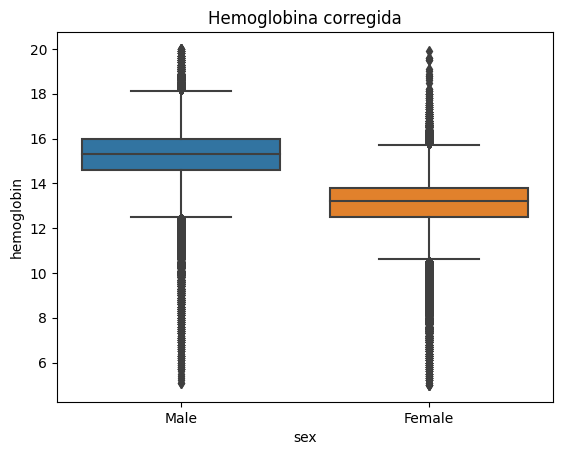

In [ ]:
sns.boxplot(data = habitos2, x= 'sex', y='hemoglobin')
plt.title('Hemoglobina corregida')

plt.show()

##Proteinuria

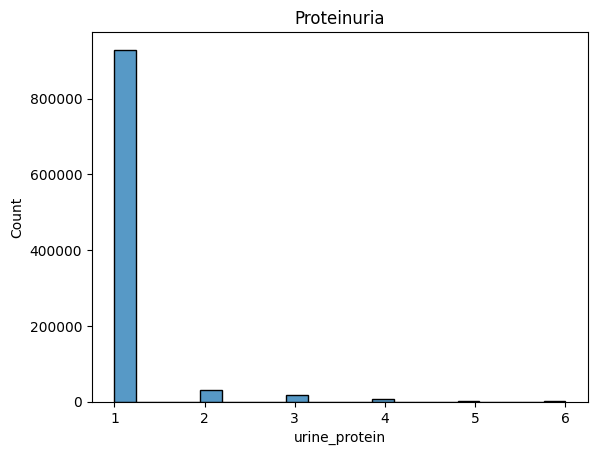

In [ ]:
sns.histplot(habitos2['urine_protein'])
plt.title('Proteinuria')

plt.show()

Los datos son correctos, no requiere ajustes.

##Creatinina sérica

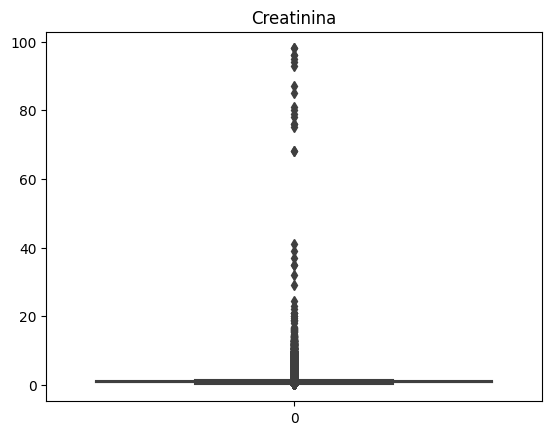

In [ ]:
sns.boxplot(habitos2['serum_creatinine'])
plt.title('Creatinina')

plt.show()

El valor de la creatinina sérica, incluso en una persona con insuficiencia renal grave, no supera los 5 mg/dl.

In [ ]:
# contar outliers Creatinina. VALOR DE REFERENCIA MÁXIMO 5
# outliers altos
cantidad_supra = (habitos2['serum_creatinine'] > 5).sum()
print(f'Por encima: {cantidad_supra}')

Por encima: 509


In [ ]:
# borrar outliers Creatinina
habitos2 = habitos2[habitos2['serum_creatinine'] <= 5]

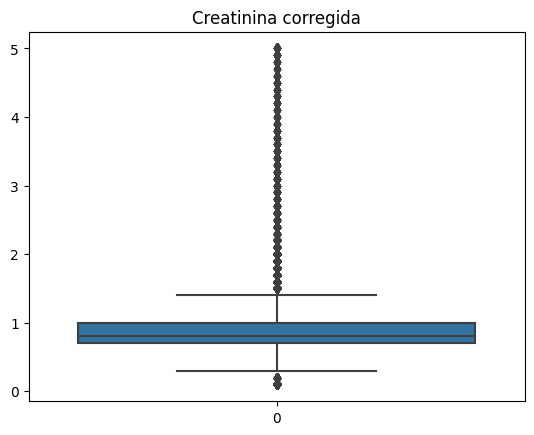

In [ ]:
sns.boxplot(habitos2['serum_creatinine'])
plt.title('Creatinina corregida')

plt.show()

##TGO - AST

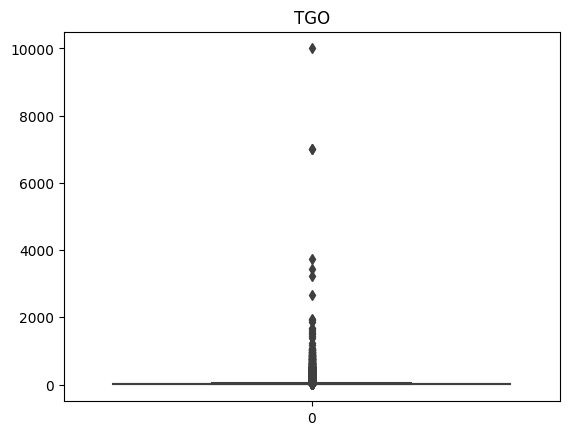

In [ ]:
sns.boxplot(habitos2['SGOT_AST'])
plt.title('TGO')

plt.show()

El valor máximo es 350 UI/L.

In [ ]:
# contar outliers TGO. VALOR DE REFERENCIA MÁXIMO 350
# outliers altos
cantidad_supra = (habitos2['SGOT_AST'] > 350).sum()
print(f'Por encima: {cantidad_supra}')

Por encima: 280


In [ ]:
# borrar outliers TGO
habitos2 = habitos2[habitos2['SGOT_AST'] <= 350]

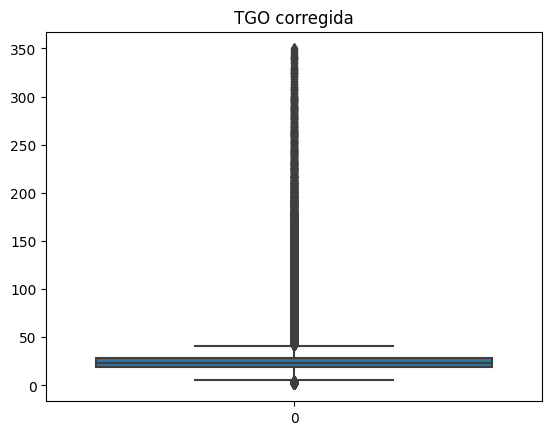

In [ ]:
sns.boxplot(habitos2['SGOT_AST'])
plt.title('TGO corregida')

plt.show()

##TGP - ALT

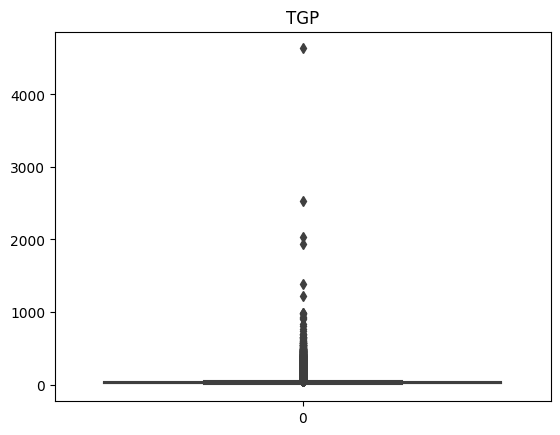

In [ ]:
sns.boxplot(habitos2['SGOT_ALT'])
plt.title('TGP')

plt.show()

El valor máximo es 350 UI/L.

In [ ]:
# contar outliers TGP. VALOR DE REFERENCIA MÁXIMO 350
# outliers altos
cantidad_supra = (habitos2['SGOT_ALT'] > 350).sum()
print(f'Por encima: {cantidad_supra}')

Por encima: 199


In [ ]:
# borrar outliers TGO
habitos2 = habitos2[habitos2['SGOT_ALT'] <= 350]

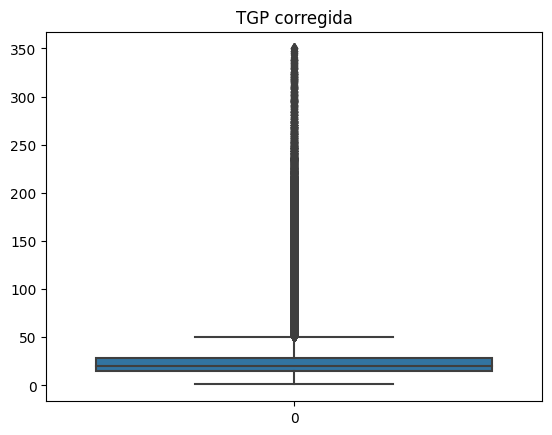

In [ ]:
sns.boxplot(habitos2['SGOT_ALT'])
plt.title('TGP corregida')

plt.show()

##Gamma_GTP

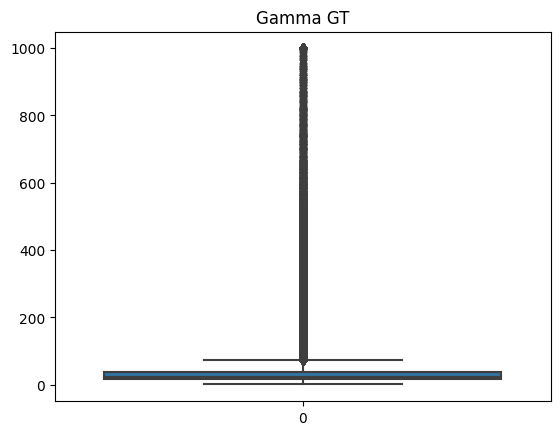

In [ ]:
sns.boxplot(habitos2['gamma_GTP'])
plt.title('Gamma GT')

plt.show()

El valor máximo es 400 UI/L.

In [ ]:
# contar outliers TGP. VALOR DE REFERENCIA MÁXIMO 400
# outliers altos
cantidad_supra = (habitos2['gamma_GTP'] > 400).sum()
print(f'Por encima: {cantidad_supra}')

Por encima: 2924


In [ ]:
# borrar outliers TGO
habitos2 = habitos2[habitos2['gamma_GTP'] <= 400]

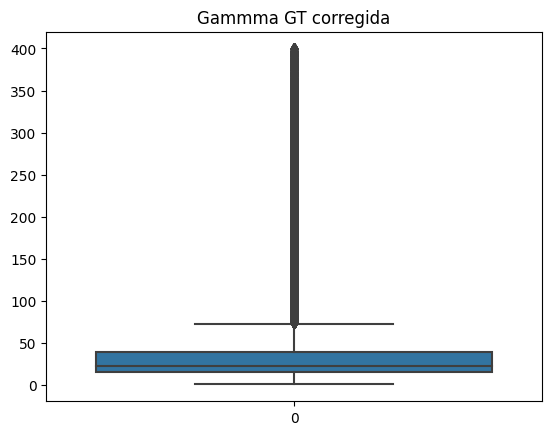

In [ ]:
sns.boxplot(habitos2['gamma_GTP'])
plt.title('Gammma GT corregida')

plt.show()

##Status de fumador

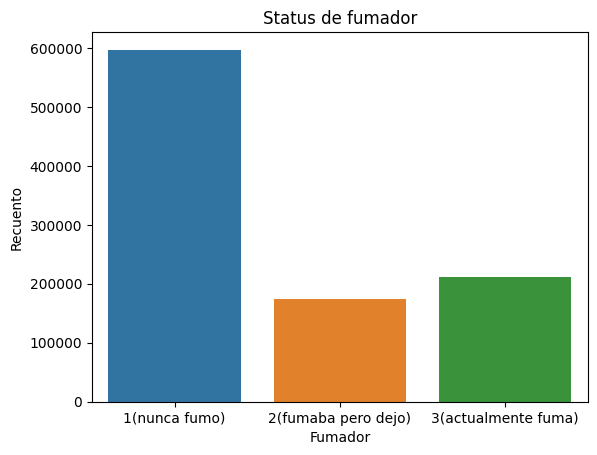

In [ ]:
sns.countplot(x='SMK_stat_type_cd', data = habitos2)
plt.xlabel('Fumador')
plt.ylabel('Recuento')
plt.title('Status de fumador')

x_values = [0,1,2]
x_labels = ['1(nunca fumo)', '2(fumaba pero dejo)', '3(actualmente fuma)']
plt.xticks(x_values, x_labels)

plt.show()

##Status de bebedor

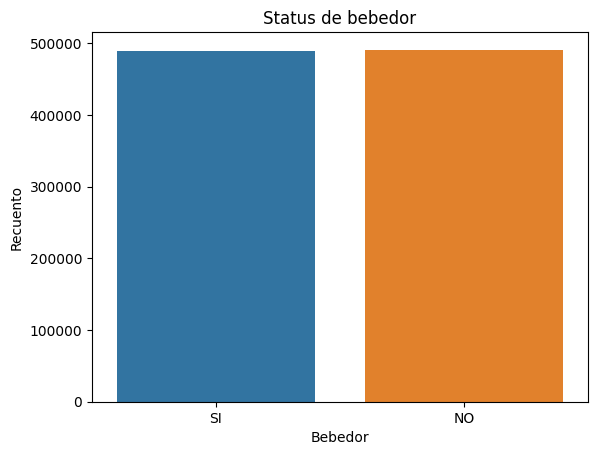

In [ ]:
sns.countplot(x='DRK_YN', data = habitos2)
plt.xlabel('Bebedor')
plt.ylabel('Recuento')
plt.title('Status de bebedor')

x_values = [0,1]
x_labels = ['SI', 'NO']
plt.xticks(x_values, x_labels)

plt.show()

##Edad / Visión izquierda / Visión derecha

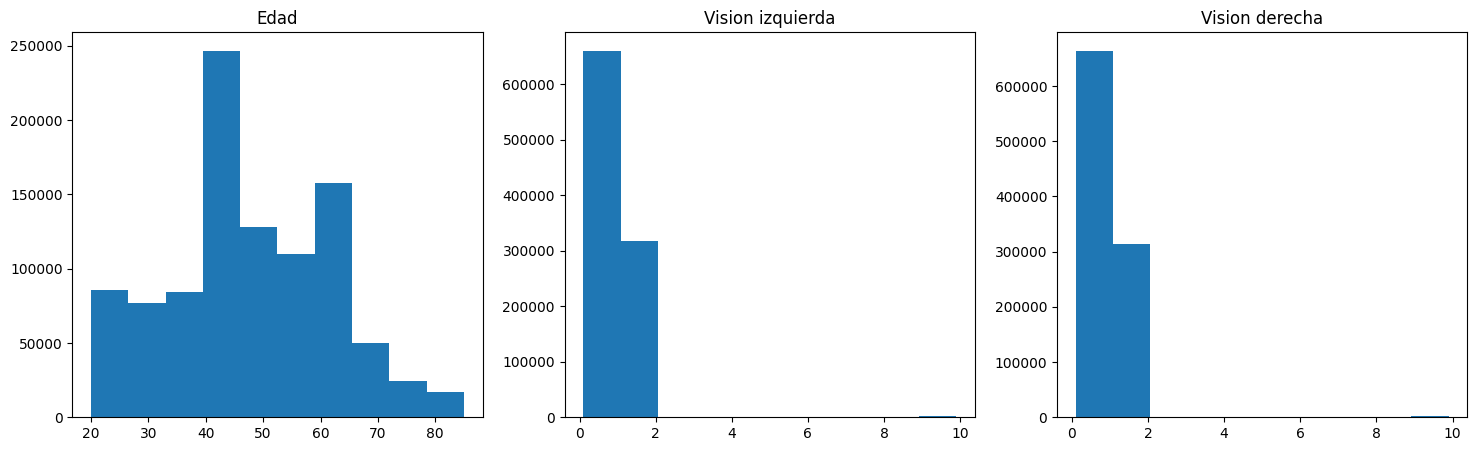

In [ ]:
fig, graficos = plt.subplots(1,3, figsize = (18,5))

graficos[0].hist(habitos2['age'])
graficos[0].set_title('Edad')
graficos[1].hist(habitos2['sight_left'])
graficos[1].set_title('Vision izquierda')
graficos[2].hist(habitos2['sight_right'])
graficos[2].set_title('Vision derecha')

fig.show()

La edad está bien, en visión el maximo es 2. Busco outliers y los borro.

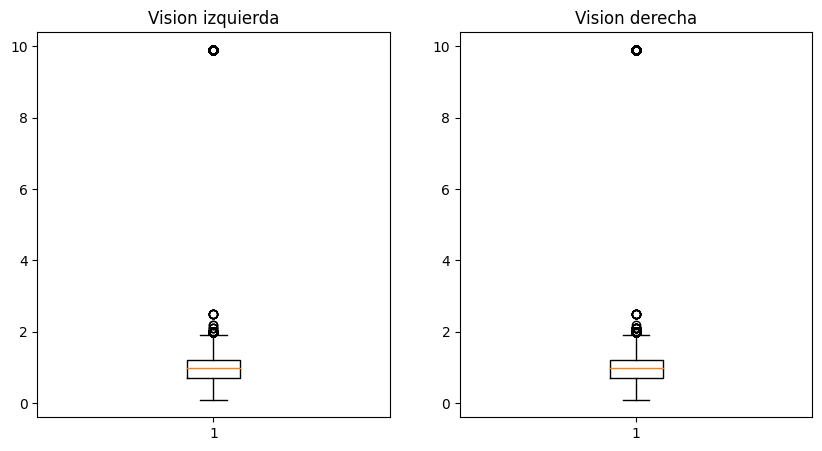

In [ ]:
fig, graficos = plt.subplots(1,2, figsize = (10,5))

graficos[0].boxplot(habitos2['sight_left'])
graficos[0].set_title('Vision izquierda')
graficos[1].boxplot(habitos2['sight_right'])
graficos[1].set_title('Vision derecha')

fig.show()

In [ ]:
# contar outliers vision izquierda
# outliers altos
cantidad_supra = (habitos2['sight_left'] > 2).sum()
print(f'Por encima: {cantidad_supra}')

Por encima: 3061


In [ ]:
# borrar outliers vision izquierda
habitos2 = habitos2[habitos2['sight_left'] <= 2]

In [ ]:
# contar outliers vision derecha
# outliers altos
cantidad_supra = (habitos2['sight_right'] > 2).sum()
print(f'Por encima: {cantidad_supra}')

Por encima: 2572


In [ ]:
# borrar outliers vision derecha
habitos2 = habitos2[habitos2['sight_right'] <= 2]

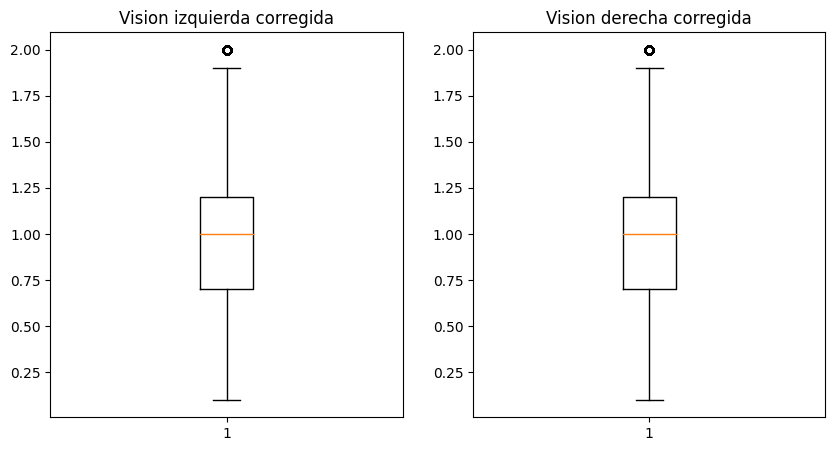

In [ ]:
fig, graficos = plt.subplots(1,2, figsize = (10,5))

graficos[0].boxplot(habitos2['sight_left'])
graficos[0].set_title('Vision izquierda corregida')
graficos[1].boxplot(habitos2['sight_right'])
graficos[1].set_title('Vision derecha corregida')

fig.show()

##Audición izquierda / Audición derecha

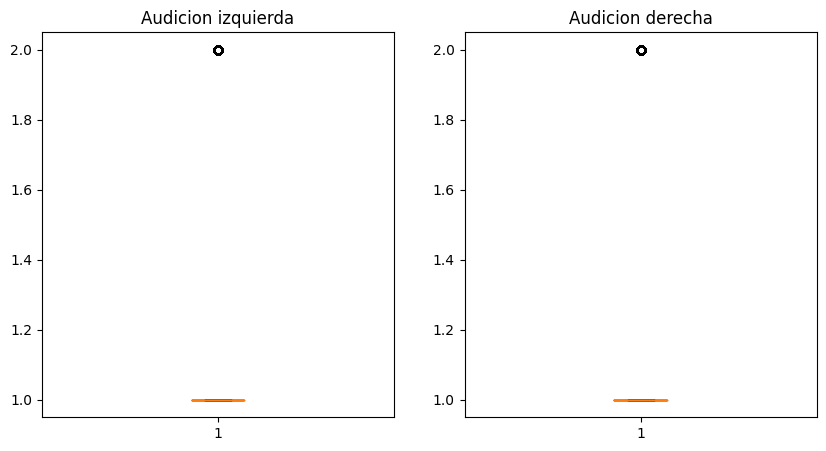

In [ ]:
fig, graficos = plt.subplots(1,2, figsize = (10,5))

graficos[0].boxplot(habitos2['hear_left'])
graficos[0].set_title('Audicion izquierda')
graficos[1].boxplot(habitos2['hear_right'])
graficos[1].set_title('Audicion derecha')

fig.show()

Pondré como valor máximo 1.2.

In [ ]:
# borrar outliers de audicion izquierda y derecha
habitos2 = habitos2[habitos2['hear_left'] <= 1.2]
habitos2 = habitos2[habitos2['hear_right'] <= 1.2]

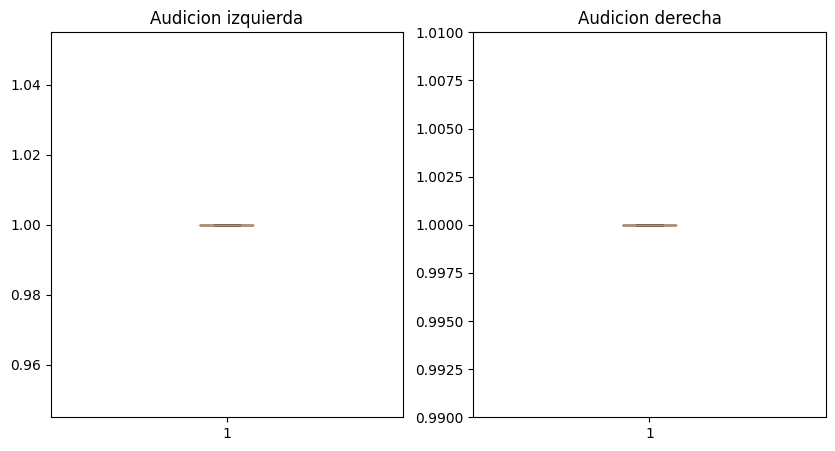

In [ ]:
fig, graficos = plt.subplots(1,2, figsize = (10,5))

graficos[0].boxplot(habitos2['hear_left'])
graficos[0].set_title('Audicion izquierda')
plt.ylim(0.99,1.01)
graficos[1].boxplot(habitos2['hear_right'])
graficos[1].set_title('Audicion derecha')
plt.ylim(0.99,1.01)

fig.show()

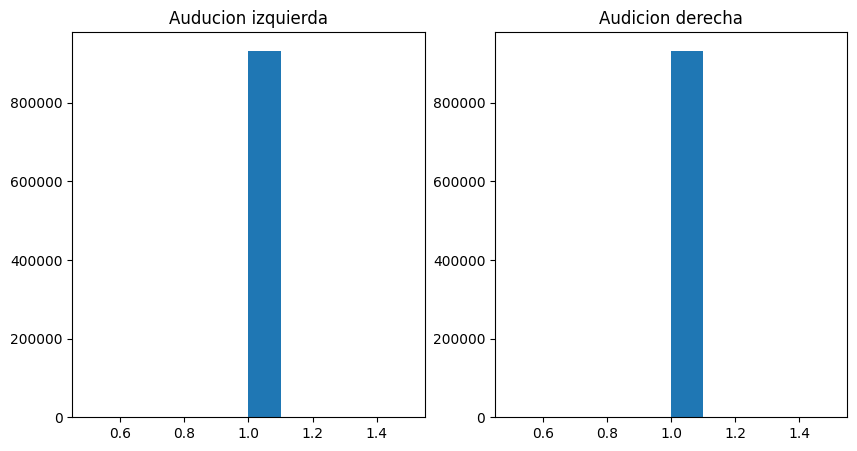

In [ ]:
fig, graficos = plt.subplots(1,2, figsize = (10,5))

graficos[0].hist(habitos2['hear_left'])
graficos[0].set_title('Auducion izquierda')
graficos[1].hist(habitos2['hear_right'])
graficos[1].set_title('Audicion derecha')

fig.show()

##Altura


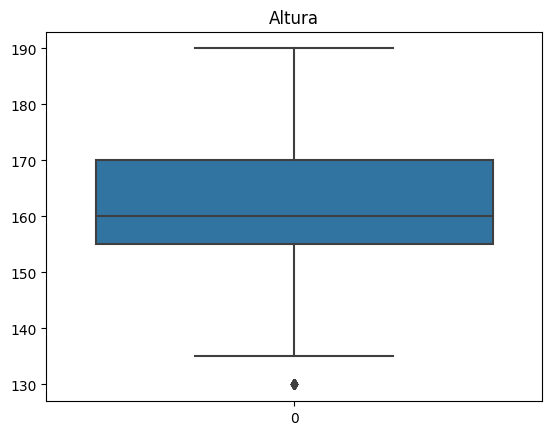

In [ ]:
sns.boxplot(habitos2['height'])
plt.title('Altura')

plt.show()

Altura mínima para un adulto: 1.40 m.

In [ ]:
# contar outliers altura. VALOR DE REFERENCIA MÍNIMO 140
# outliers bajos
cantidad_infra = (habitos2['height'] < 140).sum()
print(f'Por debajo: {cantidad_infra}')

Por debajo: 760


In [ ]:
# borrar outliers altura
habitos2 = habitos2[habitos2['height'] >= 140]

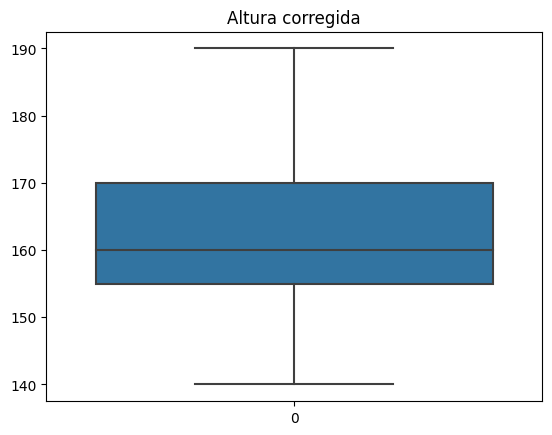

In [ ]:
sns.boxplot(habitos2['height'])
plt.title('Altura corregida')

plt.show()

In [ ]:
# Paso los datos a un nuevo csv
habitos2.to_csv('/content/drive/MyDrive/CoderHouse_DataScience/TPintegrador/preentrega2/archivos_csv/habitos_corregido.csv')

#5b) EDA - segunda exploración:

Vuelvo a hacer el análisis exploratorio una vez corregidos los datos.

In [ ]:
habitos = pd.read_csv('/content/drive/MyDrive/CoderHouse_DataScience/TPintegrador/preentrega2/archivos_csv/habitos_corregido.csv')
habitos.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,sex,age,height,weight,waistline,sight_left,sight_right,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,0,0,Male,35,170,75,90.0,1.0,1.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,1,1,1,Male,30,180,80,89.0,0.9,1.2,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,2,2,2,Male,40,165,75,91.0,1.2,1.5,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,3,3,3,Male,50,175,80,91.0,1.5,1.2,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,4,4,4,Male,50,165,60,80.0,1.0,1.2,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [ ]:
#Borrar las tres primeras columnas (Unnamed)
habitos = habitos.drop(columns=['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0.2'])
habitos.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [ ]:
# Informacion del dataframe
print('Estructura del dataframe: ', habitos.shape)
habitos.info()

Estructura del dataframe:  (931891, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931891 entries, 0 to 931890
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               931891 non-null  object 
 1   age               931891 non-null  int64  
 2   height            931891 non-null  int64  
 3   weight            931891 non-null  int64  
 4   waistline         931891 non-null  float64
 5   sight_left        931891 non-null  float64
 6   sight_right       931891 non-null  float64
 7   hear_left         931891 non-null  float64
 8   hear_right        931891 non-null  float64
 9   SBP               931891 non-null  float64
 10  DBP               931891 non-null  float64
 11  BLDS              931891 non-null  float64
 12  tot_chole         931891 non-null  float64
 13  HDL_chole         931891 non-null  float64
 14  LDL_chole         931891 non-null  float64
 15  triglyceride      931891 non

Puedo observar que el dataframe consta de 931.891 filas y 24 columnas, sin datos nulos. La mayor parte de las columnas contienen datos numéricos.

* **Dimensiones:** age,	sex,	SMK_stat_type_cd,	DRK_YN.
* **Medidas:** height,	weight,	waistline, sight_left,	sight_right,	hear_left,	hear_right,		urine_protein, SBP, DBP, BLDS, tot_chole, HDL_chole, 	LDL_chole,	triglyceride,	hemoglobin, serum_creatinine,	 SGOT_AST, 	SGOT_ALT,	gamma_GTP.

Considero que, si bien **age** es un valor numérico, funciona como dimensión, ya que sirve para clasificar los datos y no es posible realizar operaciones con estos números (más alla de un recuento).

In [ ]:
# Estadisticas del dataframe
# Lo divido en 3 parte porque no caben todas las columnas en una sola consulta
habitos[['sex','age','height','weight','waistline','sight_left','sight_right','hear_left','hear_right']].describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right
count,931891.000000,931891.000000,931891.000000,931891.000000,931891.000000,931891.000000,931891.0,931891.0
mean,46.775776,162.487276,63.485826,81.079818,0.963318,0.960773,1.0,1.0
std,13.799948,9.176914,12.493671,9.591522,0.338806,0.337297,0.0,0.0
min,20.000000,140.000000,40.000000,49.000000,0.100000,0.100000,1.0,1.0
25%,35.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.0,1.0
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.0,1.0
75%,55.000000,170.000000,70.000000,87.300000,1.200000,1.200000,1.0,1.0
max,85.000000,190.000000,140.000000,130.000000,2.000000,2.000000,1.0,1.0


In [ ]:
habitos[['SBP','DBP', 'BLDS','tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin']].describe()

,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin
count,931891.000000,931891.000000,931891.000000,931891.000000,931891.000000,931891.000000,931891.000000,931891.000000
mean,122.147602,76.000486,99.861115,195.639020,56.986505,113.282925,130.063687,14.247914
std,14.418663,9.870289,22.544738,37.484597,14.672038,34.062800,89.766941,1.578504
min,70.000000,33.000000,40.000000,55.000000,5.000000,20.000000,10.000000,5.000000
25%,111.000000,70.000000,88.000000,170.000000,46.000000,89.000000,73.000000,13.200000
50%,120.000000,76.000000,95.000000,193.000000,55.000000,111.000000,106.000000,14.300000
75%,130.000000,82.000000,104.000000,219.000000,66.000000,135.000000,158.000000,15.400000
max,273.000000,185.000000,350.000000,400.000000,120.000000,280.000000,1000.000000,20.000000


In [ ]:
habitos[['urine_protein','serum_creatinine','SGOT_AST','SGOT_ALT','gamma_GTP','SMK_stat_type_cd','DRK_YN']].describe()

,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,931891.000000,931891.000000,931891.000000,931891.000000,931891.000000,931891.000000
mean,1.089659,0.852522,25.469501,25.394453,35.169949,1.610684
std,0.423034,0.210717,12.852803,19.246592,37.048928,0.820688
min,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,6.000000,5.000000,348.000000,350.000000,400.000000,3.000000


**No tengo datos nulos. Todos los outliers ya fueron corregidos previamente.**

##Manipulación de columnas


###Agrego nuevas columnas

**Agrego una columna que calcule el IMC -->  peso(kg)/ (talla(m)**2)**

In [ ]:
habitos['IMC']=round(habitos['weight']/((habitos['height']/100)**2),1)
habitos.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,IMC
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,26.0
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,24.7
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,27.5
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,26.1
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,22.0
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y,20.2
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,N,24.4
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y,21.2
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,Y,26.0
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y,24.5


**Agrego una columna que calcule la tensión arterial media -->  (TAS - TAD)/3 + TAD**

In [ ]:
# creo la columna TAM (TA media)
habitos['TAM'] = round(((habitos['SBP']-habitos['DBP'])/3)+habitos['DBP'],1)
habitos.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,IMC,TAM
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,26.0,93.3
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,24.7,98.0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,27.5,86.7
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,26.1,106.3
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,22.0,100.7
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y,20.2,108.7
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,12.3,1.0,0.8,19.0,12.0,12.0,1.0,N,24.4,72.3
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y,21.2,97.3
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,15.1,1.0,0.8,32.0,23.0,26.0,1.0,Y,26.0,105.0
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y,24.5,114.0


###Modifico columnas

**También debo convertir la columna sex a numérica: Masculino = 0; Femenino = 1**

In [ ]:
habitos['cod_sex'] = habitos.sex.apply(lambda x: 0 if x == 'Male' else 1)
habitos.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,IMC,TAM,cod_sex
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,1.0,1.0,21.0,35.0,40.0,1.0,Y,26.0,93.3,0
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,1.0,0.9,20.0,36.0,27.0,3.0,N,24.7,98.0,0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,1.0,0.9,47.0,32.0,68.0,1.0,N,27.5,86.7,0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,1.0,1.1,29.0,34.0,18.0,1.0,N,26.1,106.3,0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,1.0,0.8,19.0,12.0,25.0,1.0,N,22.0,100.7,0
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,3.0,0.8,29.0,40.0,37.0,3.0,Y,20.2,108.7,0
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,1.0,0.8,19.0,12.0,12.0,1.0,N,24.4,72.3,1
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,1.0,0.8,18.0,18.0,35.0,3.0,Y,21.2,97.3,0
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,1.0,0.8,32.0,23.0,26.0,1.0,Y,26.0,105.0,0
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,1.0,0.9,21.0,38.0,16.0,2.0,Y,24.5,114.0,0


**Para el análisis voy a convertir la columna DRK_YN a numérica: N = 0; Y = 1**

In [ ]:
habitos['cod_drk'] = habitos.DRK_YN.apply(lambda x: 0 if x == 'N' else 1)
habitos.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,IMC,TAM,cod_sex,cod_drk
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,1.0,21.0,35.0,40.0,1.0,Y,26.0,93.3,0,1
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,0.9,20.0,36.0,27.0,3.0,N,24.7,98.0,0,0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,0.9,47.0,32.0,68.0,1.0,N,27.5,86.7,0,0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,1.1,29.0,34.0,18.0,1.0,N,26.1,106.3,0,0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,0.8,19.0,12.0,25.0,1.0,N,22.0,100.7,0,0
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,0.8,29.0,40.0,37.0,3.0,Y,20.2,108.7,0,1
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,0.8,19.0,12.0,12.0,1.0,N,24.4,72.3,1,0
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,0.8,18.0,18.0,35.0,3.0,Y,21.2,97.3,0,1
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,0.8,32.0,23.0,26.0,1.0,Y,26.0,105.0,0,1
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,0.9,21.0,38.0,16.0,2.0,Y,24.5,114.0,0,1


###Borro columnas

In [ ]:
# Borro las columnas redundantes: sex (porque cree la numérica), height y weight (porque se resumen en IMC).
# SBP y DBP se resumen en TAM pero por ahora las dejo
habitos.drop(['sex','height', 'weight'], axis=1, inplace=True)

In [ ]:
# elimino la columna de texto DRK_YN
habitos.drop('DRK_YN', axis=1, inplace=True)

In [ ]:
habitos.describe()

,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,...,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,IMC,TAM,cod_sex,cod_drk
count,931891.000000,931891.000000,931891.000000,931891.000000,931891.0,931891.0,931891.000000,931891.000000,931891.000000,931891.000000,...,931891.000000,931891.000000,931891.000000,931891.000000,931891.000000,931891.000000,931891.000000,931891.000000,931891.000000,931891.000000
mean,46.775776,81.079818,0.963318,0.960773,1.0,1.0,122.147602,76.000486,99.861115,195.639020,...,1.089659,0.852522,25.469501,25.394453,35.169949,1.610684,23.921846,91.381420,0.469366,0.507283
std,13.799948,9.591522,0.338806,0.337297,0.0,0.0,14.418663,9.870289,22.544738,37.484597,...,0.423034,0.210717,12.852803,19.246592,37.048928,0.820688,3.514610,10.660566,0.499061,0.499947
min,20.000000,49.000000,0.100000,0.100000,1.0,1.0,70.000000,33.000000,40.000000,55.000000,...,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,13.800000,50.000000,0.000000,0.000000
25%,35.000000,74.000000,0.700000,0.700000,1.0,1.0,111.000000,70.000000,88.000000,170.000000,...,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,21.500000,83.300000,0.000000,0.000000
50%,45.000000,81.000000,1.000000,1.000000,1.0,1.0,120.000000,76.000000,95.000000,193.000000,...,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,23.900000,91.300000,0.000000,1.000000
75%,55.000000,87.300000,1.200000,1.200000,1.0,1.0,130.000000,82.000000,104.000000,219.000000,...,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000,26.000000,98.000000,1.000000,1.000000
max,85.000000,130.000000,2.000000,2.000000,1.0,1.0,273.000000,185.000000,350.000000,400.000000,...,6.000000,5.000000,348.000000,350.000000,400.000000,3.000000,45.700000,202.000000,1.000000,1.000000


In [ ]:
habitos.shape

(931891, 24)

In [ ]:
# Vuelvo a guardar los cambios en un último csv
habitos.to_csv('/content/drive/MyDrive/CoderHouse_DataScience/TPintegrador/preentrega2/archivos_csv/habitos_final.csv')

##Graficos descriptivos

**Inicialmente, voy a analizar en profundidad la variable objetivo: Colesterol HDL**

In [8]:
# Cargo el csv final
habitos = pd.read_csv('/content/drive/MyDrive/CoderHouse_DataScience/TPintegrador/preentrega2/archivos_csv/habitos_final.csv')
habitos.head()

,Unnamed: 0,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,...,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,IMC,TAM,cod_sex,cod_drk
0,0,35,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,...,1.0,1.0,21.0,35.0,40.0,1.0,26.0,93.3,0,1
1,1,30,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,...,1.0,0.9,20.0,36.0,27.0,3.0,24.7,98.0,0,0
2,2,40,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,...,1.0,0.9,47.0,32.0,68.0,1.0,27.5,86.7,0,0
3,3,50,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,...,1.0,1.1,29.0,34.0,18.0,1.0,26.1,106.3,0,0
4,4,50,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,...,1.0,0.8,19.0,12.0,25.0,1.0,22.0,100.7,0,0


In [ ]:
#Borro la columna Unnamed
habitos = habitos.drop(columns=['Unnamed: 0'])
habitos.head()

,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,...,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,IMC,TAM,cod_sex,cod_drk
0,35,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,...,1.0,1.0,21.0,35.0,40.0,1.0,26.0,93.3,0,1
1,30,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,...,1.0,0.9,20.0,36.0,27.0,3.0,24.7,98.0,0,0
2,40,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,...,1.0,0.9,47.0,32.0,68.0,1.0,27.5,86.7,0,0
3,50,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,...,1.0,1.1,29.0,34.0,18.0,1.0,26.1,106.3,0,0
4,50,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,...,1.0,0.8,19.0,12.0,25.0,1.0,22.0,100.7,0,0


In [ ]:
habitos['HDL_chole'].describe()

count    931891.000000
mean         56.986505
std          14.672038
min           5.000000
25%          46.000000
50%          55.000000
75%          66.000000
max         120.000000
Name: HDL_chole, dtype: float64

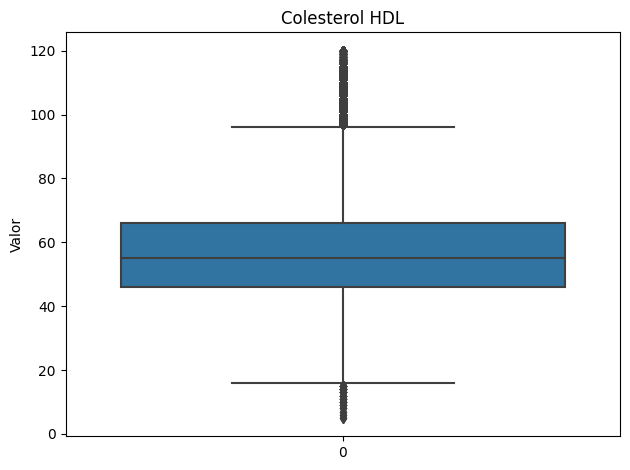

In [ ]:
sns.boxplot(habitos['HDL_chole'])
plt.title('Colesterol HDL')
plt.ylabel('Valor')

# Guardo el gráfico
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CoderHouse_DataScience/TPintegrador/preentrega2/Imagenes/boxplot-HDL.jpeg', format='jpeg', dpi=300)

plt.show()

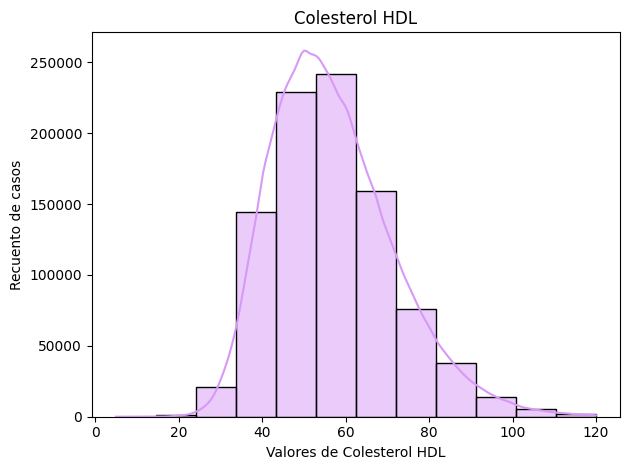

In [20]:
sns.histplot(habitos['HDL_chole'], bins=12, kde=True, color='#D799F6')
plt.title('Colesterol HDL')

plt.xlabel('Valores de Colesterol HDL')
plt.ylabel('Recuento de casos')

# Guardo el gráfico
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CoderHouse_DataScience/TPintegrador/preentrega2/Imagenes/histograma-HDL.jpeg', format='jpeg', dpi=300)

plt.show()

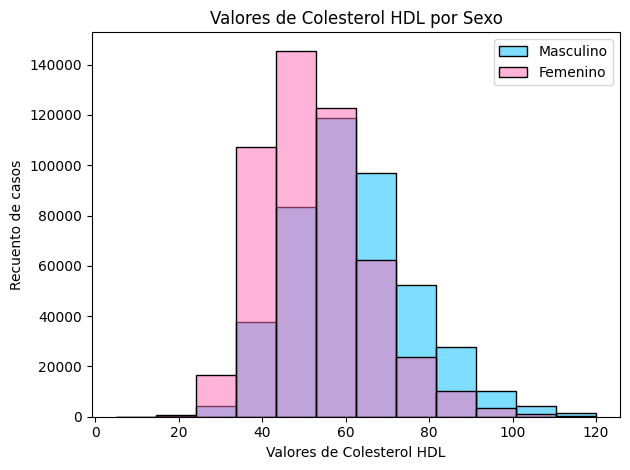

In [ ]:
labels = ['Masculino', 'Femenino']
custom_colors = {1: 'deepskyblue', 0: 'hotpink'}

sns.histplot(data=habitos, x='HDL_chole', bins=12, hue='cod_sex', palette=custom_colors)
plt.title('Valores de Colesterol HDL por Sexo')
plt.legend(labels=labels)
plt.xlabel('Valores de Colesterol HDL')
plt.ylabel('Recuento de casos')

# Guardo el gráfico
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CoderHouse_DataScience/TPintegrador/preentrega2/Imagenes/histo_sexo_HDL.jpeg', format='jpeg', dpi=300)

plt.show()

In [12]:
habitos['age'].describe()

count    931891.000000
mean         46.775776
std          13.799948
min          20.000000
25%          35.000000
50%          45.000000
75%          55.000000
max          85.000000
Name: age, dtype: float64

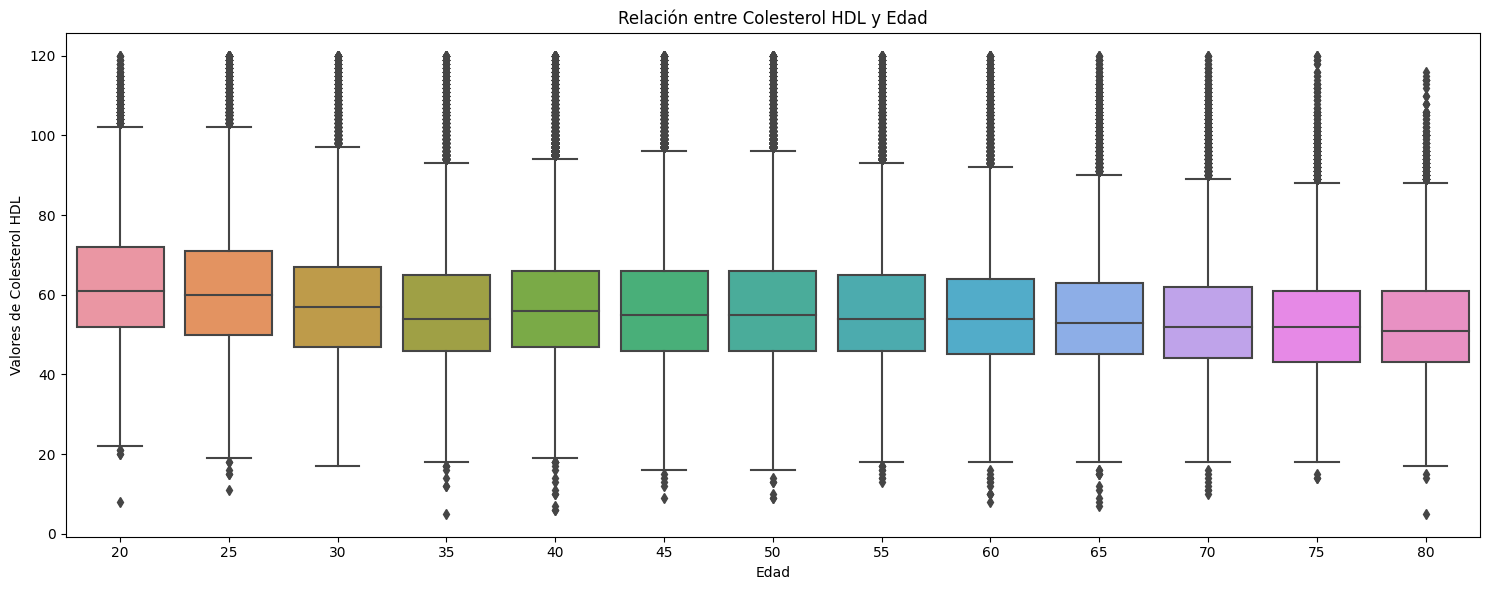

In [17]:
plt.figure(figsize= (15,6))
sns.boxplot(x='age', y='HDL_chole',  data=habitos[habitos['age'].isin([20,25,30,35,40,45,50,55,60,65,70,75,80])])
plt.title('Relación entre Colesterol HDL y Edad')

plt.xlabel('Edad')
plt.ylabel('Valores de Colesterol HDL')

# Guardo el gráfico
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CoderHouse_DataScience/TPintegrador/preentrega2/Imagenes/edad-HDL.jpeg', format='jpeg', dpi=300)

plt.show()

*A partir de estos tres gráficos podemos observar:*

*1) Los valores de colesterol HDL van de 5 mg/dl a 120 mg/dl*

*2) Los valores de colesterol HDL son en general más altos en hombres que en mujeres*

*3) Los valores de colesterol HDL muestran se distribuyen de manera similar en todos los rangos etarios*


**En segundo lugar, voy a analizar diferentes elementos que podrían relacionarse con los valores de colesterol:**

* *TA*
* *Edad*
* *Sexo*
* *IMC*
* *Perímetro de cintura*


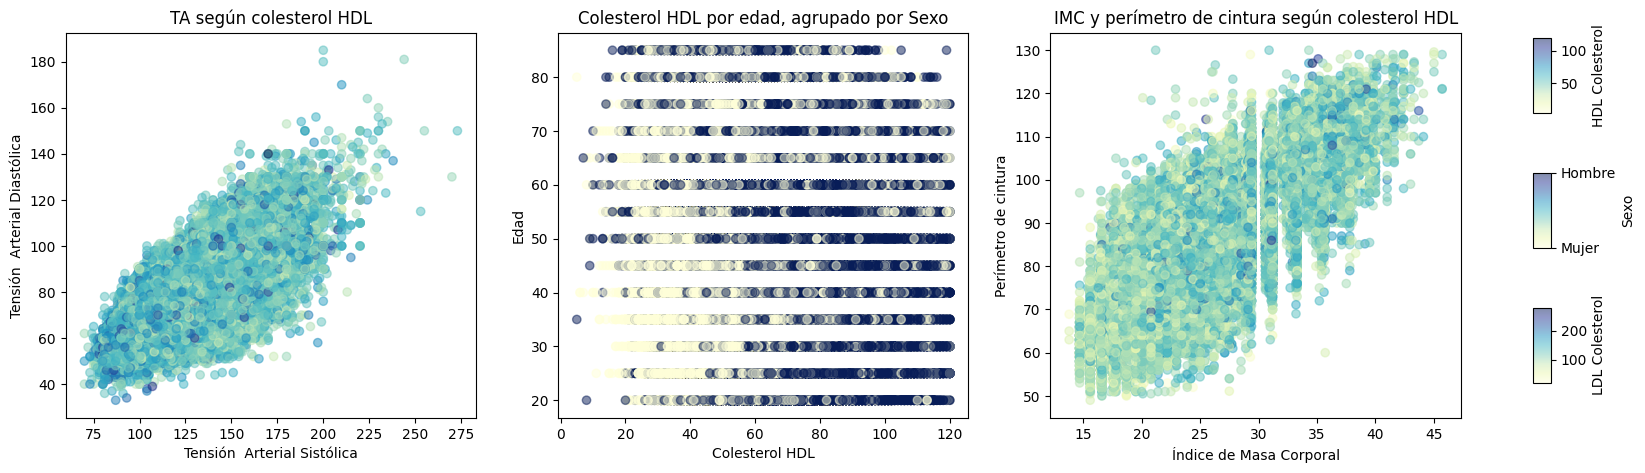

In [9]:
# Gráfico de dispersión para ver los valores de TA según colesterol
fig, dispersion_graf = plt.subplots(1,3, figsize=(18,5))

# Definimos los ters gráficos de dispersión
cmap = sns.color_palette("YlGnBu", as_cmap=True)
scatter1=dispersion_graf[0].scatter(x=habitos['SBP'], y=habitos['DBP'], marker="o", c=habitos['HDL_chole'], cmap=cmap, alpha=0.5)
scatter2=dispersion_graf[1].scatter(x=habitos['HDL_chole'], y=habitos['age'], marker="o", c=habitos['cod_sex'], cmap=cmap, alpha=0.5)
scatter3=dispersion_graf[2].scatter(x=habitos['IMC'], y=habitos['waistline'], marker="o", c=habitos['LDL_chole'], cmap=cmap, alpha=0.5)

# Contextualización gráfica y etiquetas
for i in range(3):
    if i == 0:
      dispersion_graf[i].set_xlabel('Tensión  Arterial Sistólica')
      dispersion_graf[i].set_ylabel('Tensión  Arterial Diastólica')
      dispersion_graf[i].set_title('TA según colesterol HDL')
    elif i == 1:
      dispersion_graf[i].set_xlabel('Colesterol HDL')
      dispersion_graf[i].set_ylabel('Edad')
      dispersion_graf[i].set_title('Colesterol HDL por edad, agrupado por Sexo')
    else:
      dispersion_graf[i].set_xlabel('Índice de Masa Corporal')
      dispersion_graf[i].set_ylabel('Perímetro de cintura')
      dispersion_graf[i].set_title('IMC y perímetro de cintura según colesterol HDL')

# Añadir barra de color a cada gráfico de dispersión
cbar_ax1 = fig.add_axes([0.94, 0.72, 0.01, 0.15])
cbar = fig.colorbar(scatter1, cax=cbar_ax1)
cbar.set_label("HDL Colesterol", rotation=90)

cbar_ax2 = fig.add_axes([0.94, 0.45, 0.01, 0.15])
cbar2 = fig.colorbar(scatter2, cax=cbar_ax2, ticks=[0, 1])
cbar2.set_label("Sexo", rotation=90)
cbar2.set_ticklabels(['Mujer', 'Hombre'])

cbar_ax3 = fig.add_axes([0.94, 0.18, 0.01, 0.15])
cbar3 = fig.colorbar(scatter3, cax=cbar_ax3)
cbar3.set_label("LDL Colesterol", rotation=90)

# Guardo el gráfico
#plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CoderHouse_DataScience/TPintegrador/preentrega2/Imagenes/triple-HDL.jpeg', format='jpeg', dpi=300)

plt.show()



**Conclusiones preliminares:**
* Los valores más altos de colesterol HDL se relacionan con menores valores de TA.
* En general, los hombres jóvenes tienen valores de colesterol más altos que las mujeres de su mismo rango etario.
* Los valores más altos de colesterol HDL se relacionan con menores valores de IMC y perímetro de cintura.

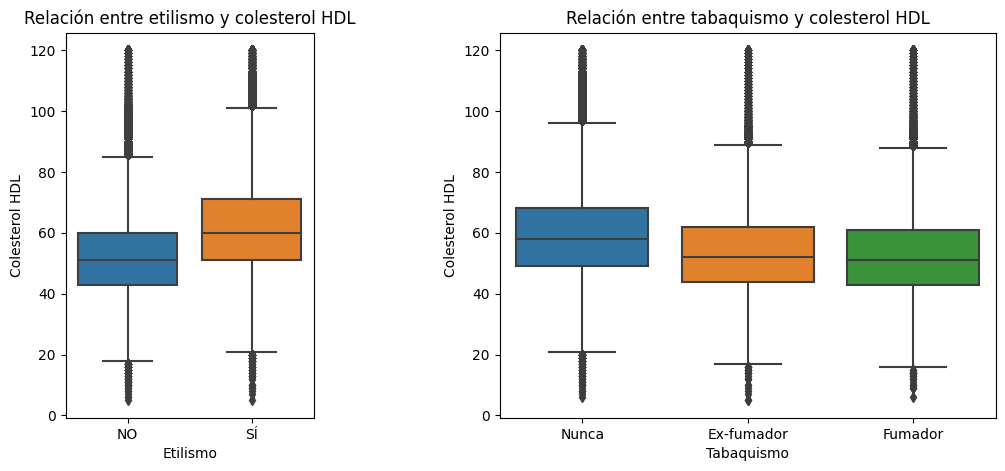

In [26]:
from matplotlib.ticker import MaxNLocator

fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 2]})
plt.subplots_adjust(wspace=0.5)

sns.boxplot(x='cod_sex', y='HDL_chole', data=habitos[habitos['cod_drk'].isin([0, 1])], ax=axes[0])
axes[0].set_title('Relación entre etilismo y colesterol HDL')
axes[0].set_xlabel('Etilismo')
axes[0].set_ylabel('Colesterol HDL')
axes[0].set_xticklabels(['NO', 'SÍ'])

sns.boxplot(x='SMK_stat_type_cd', y='HDL_chole', data=habitos[habitos['cod_drk'].isin([0, 1,2])], ax=axes[1])
axes[1].set_title('Relación entre tabaquismo y colesterol HDL')
axes[1].set_xlabel('Tabaquismo')
axes[1].set_ylabel('Colesterol HDL')
axes[1].set_xticklabels(['Nunca', 'Ex-fumador', 'Fumador'])

plt.savefig('/content/drive/MyDrive/CoderHouse_DataScience/TPintegrador/preentrega2/Imagenes/doble-HDL.jpeg', format='jpeg', dpi=300)
plt.show()


In [34]:
mediana_hombres = habitos[habitos['cod_drk'] == 0]['HDL_chole'].median()

print(mediana_hombres)

55.0


**Conclusiones preliminares:**

No se observan diferencias en los valores de colesterol HDL de acuerdo al status de etilismo ni de tabaquismo.

####Matriz de correlación

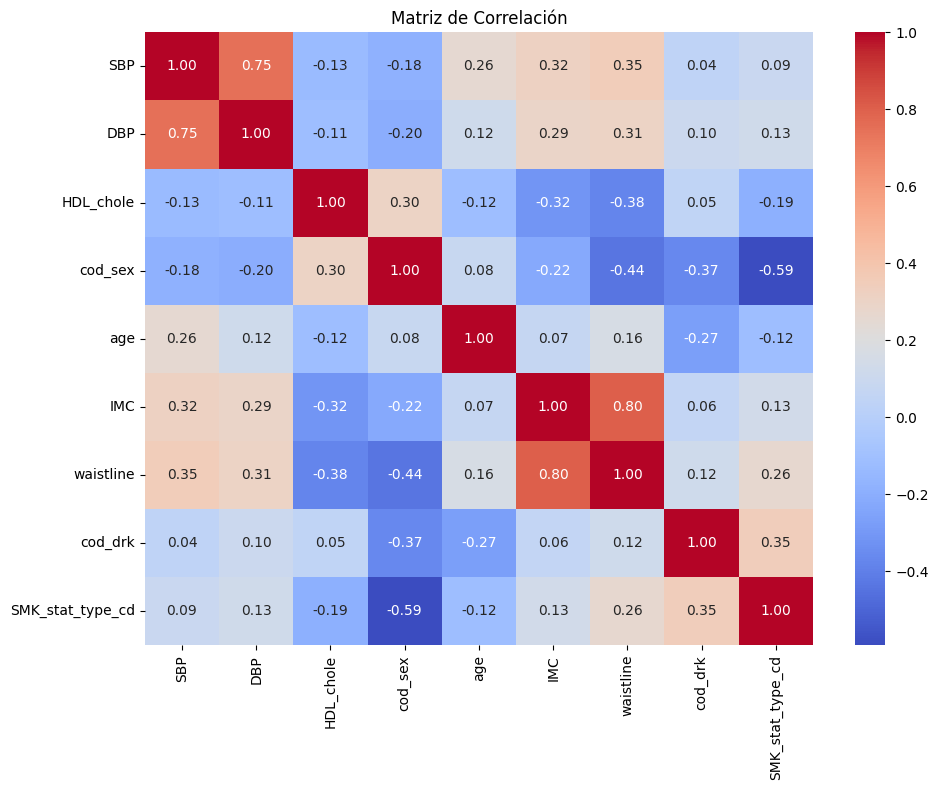

In [ ]:
# Crear la matriz de correlación

# Lista de columnas a considerar
columnas_a_considerar = ['SBP', 'DBP', 'HDL_chole', 'cod_sex','age','IMC','waistline', 'cod_drk','SMK_stat_type_cd']

# Seleccionar solo las columnas deseadas para calcular la matriz de correlación
habitos_filtrados = habitos[columnas_a_considerar]

correlation_matrix = habitos_filtrados.corr(numeric_only=True)

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlación')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CoderHouse_DataScience/TPintegrador/preentrega2/Imagenes/matriz.jpeg', format='jpeg', dpi=300)

plt.show()


**Se observan correlaciones positivas fuertes entre TA sistólica y diastólica, e IMC y perímetro de cintura. El colesterol HDL no tiene una relación fuerte con ninguna de las variables planteadas en la matriz.**

##Aprendizaje supervisado

Voy a elegir una regresión lineal, dado que mis variables son numéricas continuas (IMC, colesterol, TA, perímetro de cintura).

**Pregunta:** ¿Tiene relación el valor del colesterol HDL con la TA media?

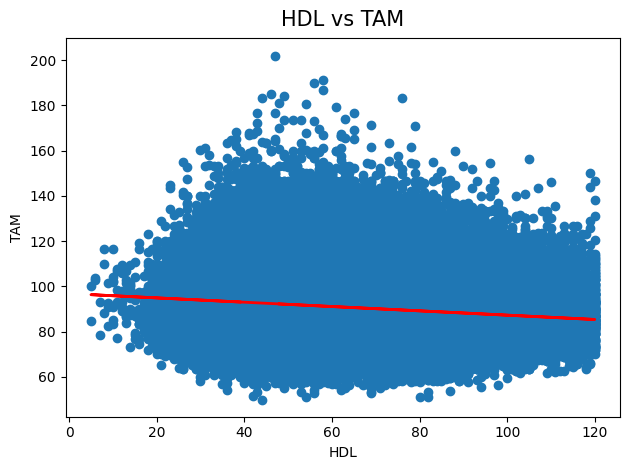

In [ ]:
# Comparo colesterol HDL con TA media
tam = habitos['TAM']
hdl = habitos['HDL_chole']

# Ajusto una regresión lineal a los datos
coefficients2 = np.polyfit(hdl, tam, 1)
b, a = coefficients2

# Creo una línea de tendencia basada en los coeficientes encontrados
trend_line2 = b * hdl + a

# Creo el segundo gráfico
plt.scatter(hdl, tam)
plt.plot(hdl, trend_line2, color='red', linewidth=2, label='Línea de Tendencia')

plt.title("HDL vs TAM", fontsize=15, verticalalignment='bottom')
plt.xlabel("HDL")
plt.ylabel("TAM")


# Guardo el gráfico
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CoderHouse_DataScience/TPintegrador/preentrega2/Imagenes/reg_lineal_TAM_HDL.jpeg', format='jpeg', dpi=300)


fig.show()

**Conclusiones:** Se observa una relación negativa leve: a mayor colesterol HDL, menor TAM.

###**Pregunta:** ¿Tienen relación el perímetro de cintura y el IMC con el colesterol HDL?

Pendiente HDL vs IMC: -0.07600044065122875


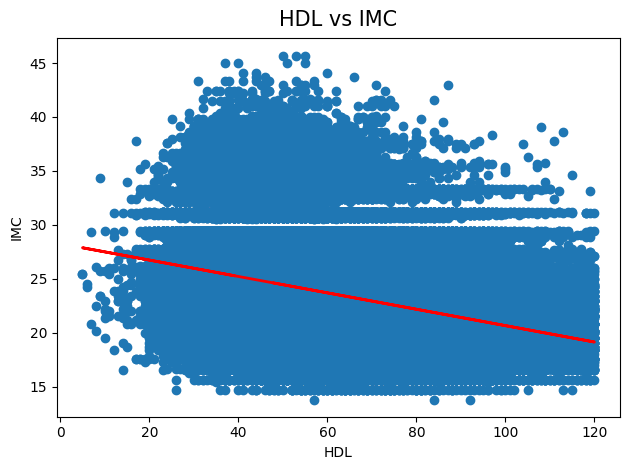

In [ ]:
# Comparo colesterol HDL con IMC y waist
hdl = habitos['HDL_chole']
imc = habitos['IMC']

# Ajusto una regresión lineal a los datos
coefficients = np.polyfit(hdl, imc, 1)
b, a = coefficients

print("Pendiente HDL vs IMC:", b)

# Creo una línea de tendencia basada en los coeficientes encontrados
trend_line = b * hdl + a

plt.scatter(hdl, imc)
plt.plot(hdl, trend_line, color='red', linewidth=2, label='Línea de Tendencia')

plt.title("HDL vs IMC", fontsize=15, verticalalignment='bottom')
plt.xlabel("HDL")
plt.ylabel("IMC")



# Guardo el gráfico
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CoderHouse_DataScience/TPintegrador/preentrega2/Imagenes/reg_lineal_IMC.jpeg', format='jpeg', dpi=300)


fig.show()



Pendiente HDL vs Cintura: -0.2457835423419015


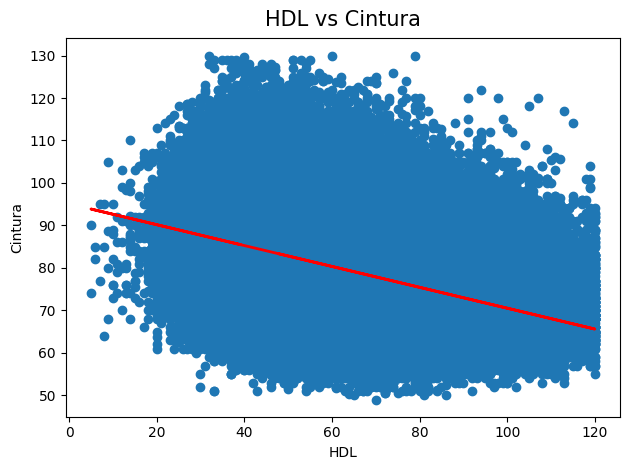

In [ ]:
# Comparo colesterol HDL con TA media
waist = habitos['waistline']

# Ajusto una regresión lineal a los datos
coefficients = np.polyfit(hdl, waist, 1)
b, a = coefficients

print("Pendiente HDL vs Cintura:", b)

# Creo una línea de tendencia basada en los coeficientes encontrados
trend_line2 = b * hdl + a

plt.scatter(hdl, waist)
plt.plot(hdl, trend_line2, color='red', linewidth=2, label='Línea de Tendencia')

plt.title("HDL vs Cintura", fontsize=15, verticalalignment='bottom')
plt.xlabel("HDL")
plt.ylabel("Cintura")

# Guardo el gráfico
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CoderHouse_DataScience/TPintegrador/preentrega2/Imagenes/reg_lineal_PC.jpeg', format='jpeg', dpi=300)


fig.show()

**SE OBSERVA QUE LOS VALORES MÁS ALTOS DE COLESTEROL HDL SE RELACIONAN CON MENORES VALORES DE IMC Y DE PERÍMETRO DE CINTURA. TENIENDO EN CUENTA EL VALOR DE LA PENDIENTE, PUEDO SABER QUE EXISTE UNA RELACIÓN NEGATIVA DÉBIL EN AMBOS CASOS.

###Busco qué variables inciden sobre el valor del colesterol HDL

In [ ]:
# defino X e y
X = habitos.drop(['HDL_chole'], axis=1) # variables que vamos a usar para entrenar el modelo
y = habitos['HDL_chole'] # variable objetivo


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Método de selección hacia adelante
sfs_forward = SequentialFeatureSelector(estimator=LinearRegression(),
                  k_features=10,
                  forward=True,
                  floating=False,
                  scoring='r2', # por ser un problema de regresión
                  cv=5) # cantidad de pliegues (ciclos de validación)

#Hacemos el ajuste fit con respecto a nuestros datos
sfs_forward.fit(X, y)

#Seleccionamos las características
selected_features_forward = sfs_forward.k_feature_names_
print("Features seleccionadas:", selected_features_forward)

Features seleccionadas: None



STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [ ]:
# Entrenar el modelo y evaluar su rendimiento con las features que obtuvimos en los métodos

# importo librerías
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

modelo_X = habitos[['age', 'waistline', 'tot_chole', 'LDL_chole', 'triglyceride', 'IMC', 'cod_sex', 'cod_drk', 'SBP','DBP']]
y = habitos['HDL_chole'] # variable objetivo

#Dividir conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(modelo_X, y, test_size=0.2, random_state=42) # randomstate: cantidad de veces que se repite

# Crear un modelo de regresión lineal
model = LinearRegression()

#Ajuste de datos
model.fit(X_train, y_train)

# Predecir los valores en el conjunto de entrenamiento y de prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


**Una vez entrenado el modelo voy a ver las métricas:**


###Evalúo las métricas del modelo de regresión lineal

In [ ]:
#MAE, MSE, RMSE, R²

#Train
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Test
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print('Train')
print(f"MAE_train: {mae_train}")  # en unidades de nuestra variable objetivo (mmHg)
print(f"MSE_train: {mse_train}") # media de los errores al cuadrado entre las predicciones y los valores reales
print(f"RMSE_train: {rmse_train}") # raiz cuadrada del MSE
print(f"R^2_train: {r2_train}") # tiene que ser cercano a 1

print('---------------------------')
print('Test')
print(f"MAE_test: {mae_test}")  # en unidades de nuestra variable objetivo (mmHg)
print(f"MSE_test: {mse_test}") # media de los errores al cuadrado entre las predicciones y los valores reales
print(f"RMSE_test: {rmse_test}") # raiz cuadrada del MSE
print(f"R^2_test: {r2_test}") # tiene que ser cercano a 1

Train
MAE_train: 2.9806807944434124
MSE_train: 28.14969849581071
RMSE_train: 5.305628944414669
R^2_train: 0.8691908177694165
---------------------------
Test
MAE_test: 2.9880877491530167
MSE_test: 28.469084545111702
RMSE_test: 5.335642842723987
R^2_test: 0.8679266733974872


**El R² es alto, significa que el modelo logra predecir en un 86.8% el valor del colesterol HDL. De acuerdo al MAE, podemos decir que la estimación del valor es precisa, con una variabilidad de +-2.98 mg/dl.**

**EN CUANTO A LA POSIBILIDAD DE UNDERFITTING Y OVERFITTING, CREO QUE EL MODELO NO CAE EN NINGUNA DE ESTAS DOS CONDICIONES, YA QUE LOS VALORES PARA TRAIN Y TEST SON MUY SIMILARES.**

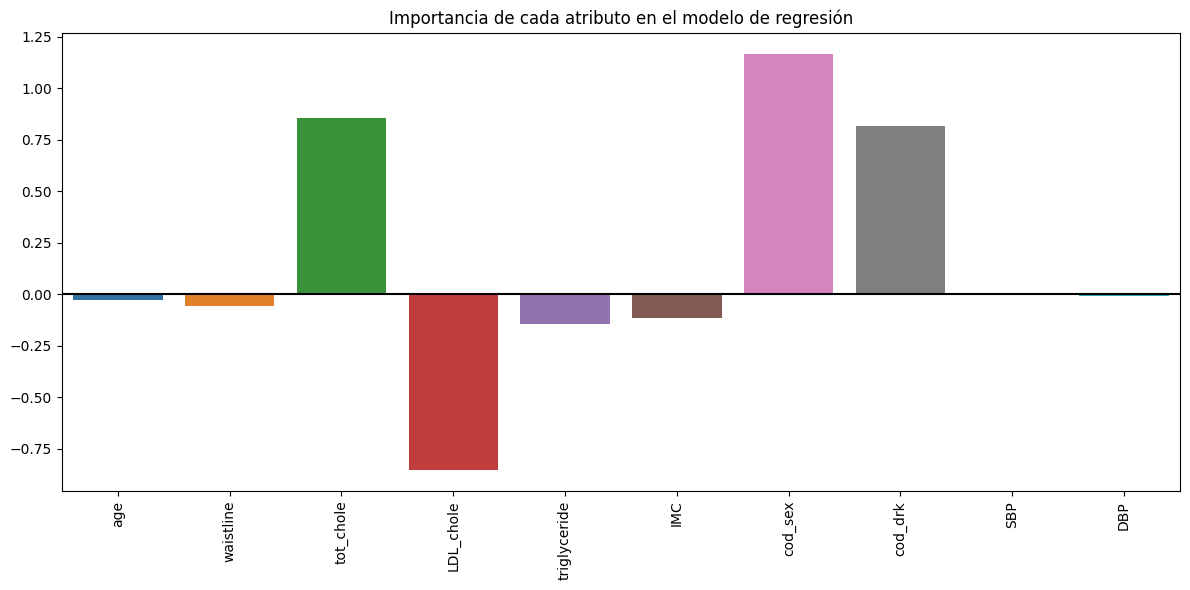

In [ ]:
# graficamos las importancias en un gráfico de barras
# creamos las variables x (importancias) e y (columnas)

coeficientes = model.coef_
columnas = X_train.columns

# Crear el gráfico de barras para mostrar la importancia de cada atributo
plt.figure(figsize=(12, 6))
sns.barplot(x=columnas, y=coeficientes)
plt.title('Importancia de cada atributo en el modelo de regresión')
plt.xticks(rotation=90)

# Agregar una línea horizontal en el eje x (valor 0)
plt.axhline(0, color='black', linestyle='-')


# Guardo el gráfico
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CoderHouse_DataScience/TPintegrador/preentrega2/Imagenes/importancias.jpeg', format='jpeg', dpi=600, bbox_inches='tight')


# Mostrar gráfico
plt.show()

#**CONCLUSIONES:**

Se logró desarrollar un modelo que logra predecir correctamente el valor del colesterol HDL a partir de otros valores del estado de salud de la persona.

A diferencia de lo planteado en la hipótesis, se observa que la edad, la tensión arterial, el IMC y el perímetro de cintura no son tan importantes para predecirlo.

Por otra parte, las variables de mayor importancia en la predicción del colesterol HDL resultaron ser el sexo, el valor del colesterol total y LDL y el status de etilismo.
